## Name: Ankit Tripathi
## USC ID: 4612676999
## Github : AnkitTripathi45

In [153]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import imblearn
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

## Question 1.a 
Data Loading 

In [154]:
d1_train= pd.read_csv("../data/aps_failure_training_set.csv",skiprows=20)
d1_train.replace(('na'),(np.nan),inplace=True)


In [155]:
d1_test=pd.read_csv("../data/aps_failure_test_set.csv",skiprows=20)
d1_test.replace(('na'),(np.nan),inplace=True)


In [156]:
df_concat_data=pd.concat([d1_train,d1_test],axis=0,ignore_index=True)
df_complete_data=df_concat_data.replace(('neg','pos'),(0,1))

In [157]:
df_complete_data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0          0   76698    NaN  2130706438    280      0      0      0      0   
1          0   33058    NaN           0    NaN      0      0      0      0   
2          0   41040    NaN         228    100      0      0      0      0   
3          0      12      0          70     66      0     10      0      0   
4          0   60874    NaN        1368    458      0      0      0      0   
...      ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995      0   81852    NaN  2130706432    892      0      0      0      0   
75996      0      18      0          52     46      8     26      0      0   
75997      0   79636    NaN        1670   1518      0      0      0      0   
75998      0     110    NaN          36     32      0      0      0      0   
75999      0       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [158]:
label_data=df_complete_data['class']

In [159]:
df_drop_class_complete=df_complete_data.drop('class',axis=1)


In [160]:
col_list=df_drop_class_complete.columns.to_list()


## Question 1.b.(i)

b) Data Preparation

This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea. 1

i. Research what types of techniques are usually used for dealing with data with
missing values.2 Pick at least one of them and apply it to this data in the
next steps.3

In [161]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_temp=imp_mean.fit_transform(df_drop_class_complete)

df_all_data=pd.DataFrame(df_temp,columns=col_list)

In [162]:
df_all_data

aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0      76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1      33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2      41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3         12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4      60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   
...        ...      ...           ...            ...     ...     ...     ...   
75995  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0     0.0   
75996     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0     0.0   
75997  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0     0.0   
75998    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0     0.0   
75999      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0     0.0   

       ag_001  ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0   318.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 170 columns]

In [163]:
df_train=df_all_data[0:60000]
df_test=df_all_data[60000:]
df_train

aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0       76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1       33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2       41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3          12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4       60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   
...         ...      ...           ...            ...     ...     ...     ...   
59995  153002.0  0.72556  6.640000e+02     186.000000     0.0     0.0     0.0   
59996    2286.0  0.72556  2.130707e+09     224.000000     0.0     0.0     0.0   
59997     112.0  0.00000  2.130706e+09      18.000000     0.0     0.0     0.0   
59998   80292.0  0.72556  2.130706e+09     494.000000     0.0     0.0     0.0   
59999   40222.0  0.72556  6.980000e+02     628.000000     0.0     0.0     0.0   

       ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0   318.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  2564.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

## Question 1.b.(ii)

For each of the 170 features, calculate the coeficient of variation CV = s
m,
where s is sample standard deviation and m is sample mean.

In [164]:
CV={}
for i in df_all_data.columns[:]:
    std=df_all_data[i].std()
    mn=df_all_data[i].mean()
    cv=std/mn
    CV[i]=cv

In [165]:
CV

{'aa_000': 4.328607835435785,
 'ab_000': 2.178272593944041,
 'ac_000': 2.1676533085378886,
 'ad_000': 206.72149958176453,
 'ae_000': 22.293670429503308,
 'af_000': 18.209015502890768,
 'ag_000': 91.46065359583645,
 'ag_001': 42.08434252956986,
 'ag_002': 17.625908567425444,
 'ag_003': 8.753299520356666,
 'ag_004': 5.475116255434917,
 'ag_005': 2.9642299310403146,
 'ag_006': 2.3525878821684465,
 'ag_007': 2.8124979751566856,
 'ag_008': 6.274980079892739,
 'ag_009': 32.16705734053676,
 'ah_000': 2.3155400947419187,
 'ai_000': 18.506308128781928,
 'aj_000': 43.14447956358556,
 'ak_000': 78.62298773590766,
 'al_000': 9.11199122164582,
 'am_0': 9.067195453929418,
 'an_000': 2.2542266522583447,
 'ao_000': 2.2761144767667703,
 'ap_000': 3.0858848873966314,
 'aq_000': 2.853471317417596,
 'ar_000': 10.569202321811572,
 'as_000': 113.88275538316807,
 'at_000': 23.18705992823811,
 'au_000': 86.0856375114368,
 'av_000': 5.7304853575294405,
 'ax_000': 3.8590349934226182,
 'ay_000': 40.9025187557738

## Question 1.b.(iii)

Plot a correlation matrix for your features using pandas or any other tool.

In [166]:
df_all_data.corr()

aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.019725 -0.011658 -0.000541  0.025795  0.035994  0.011682   
ab_000  0.019725  1.000000 -0.010898  0.000066  0.024869  0.043276  0.000590   
ac_000 -0.011658 -0.010898  1.000000 -0.002030 -0.004769 -0.010612  0.015534   
ad_000 -0.000541  0.000066 -0.002030  1.000000 -0.000195 -0.000236 -0.000038   
ae_000  0.025795  0.024869 -0.004769 -0.000195  1.000000  0.829986 -0.000441   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.356969  0.013598 -0.018631 -0.000462  0.036619  0.046482  0.007631   
ee_008  0.259668  0.002371  0.010435 -0.000794 -0.008393 -0.010843  0.000067   
ee_009  0.133764  0.000506  0.017293 -0.000500 -0.006952 -0.008539 -0.001103   
ef_000  0.006688  0.046897 -0.006191 -0.000082  0.063587  0.093474 -0.000076   
eg_000  0.010330  0.075683  0.015826 -0.000091  0.030854  0.044368  0.000156   

          ag_001    ag_002    ag_003  ...    ee_002    ee_003    ee_004  \
aa_000  0.076378  0.195161  0.307443  ...  0.414125  0.419912  0.409659   
ab_000  0.006547  0.023484  0.035696  ...  0.025161  0.037052  0.028766   
ac_000 -0.002333 -0.009439 -0.022889  ... -0.009808 -0.006437 -0.007962   
ad_000 -0.000034 -0.000093 -0.000223  ... -0.000883 -0.000921 -0.000908   
ae_000 -0.000609  0.001948  0.020678  ...  0.012751  0.019441  0.012847   
...          ...       ...       ...  ...       ...       ...       ...   
ee_007  0.068003  0.181967  0.475570  ...  0.442199  0.432911  0.419633   
ee_008  0.005353  0.009109  0.020684  ...  0.442532  0.470574  0.448390   
ee_009 -0.003540 -0.009089 -0.018164  ...  0.224587  0.235844  0.220785   
ef_000  0.001140  0.005625  0.011036  ...  0.003718  0.010177  0.002989   
eg_000  0.003654  0.013414  0.010604  ...  0.003999  0.006683  0.007236   

          ee_005    ee_006    ee_007    ee_008    ee_009    ef_000    eg_000  
aa_000  0.419780  0.425679  0.356969  0.259668  0.133764  0.006688  0.010330  
ab_000  0.034201  0.023921  0.013598  0.002371  0.000506  0.046897  0.075683  
ac_000 -0.008115 -0.014680 -0.018631  0.010435  0.017293 -0.006191  0.015826  
ad_000 -0.000730 -0.000745 -0.000462 -0.000794 -0.000500 -0.000082 -0.000091  
ae_000  0.026437  0.066533  0.036619 -0.008393 -0.006952  0.063587  0.030854  
...          ...       ...       ...       ...       ...       ...       ...  
ee_007  0.380132  0.543449  1.000000  0.227098  0.063065 -0.000309  0.000946  
ee_008  0.394020  0.365686  0.227098  1.000000  0.690147 -0.005173 -0.001950  
ee_009  0.183844  0.158590  0.063065  0.690147  1.000000 -0.003168 -0.001059  
ef_000  0.026924  0.005298 -0.000309 -0.005173 -0.003168  1.000000  0.222579  
eg_000  0.008497  0.015273  0.000946 -0.001950 -0.001059  0.222579  1.000000  

[170 rows x 170 columns]

<AxesSubplot:>

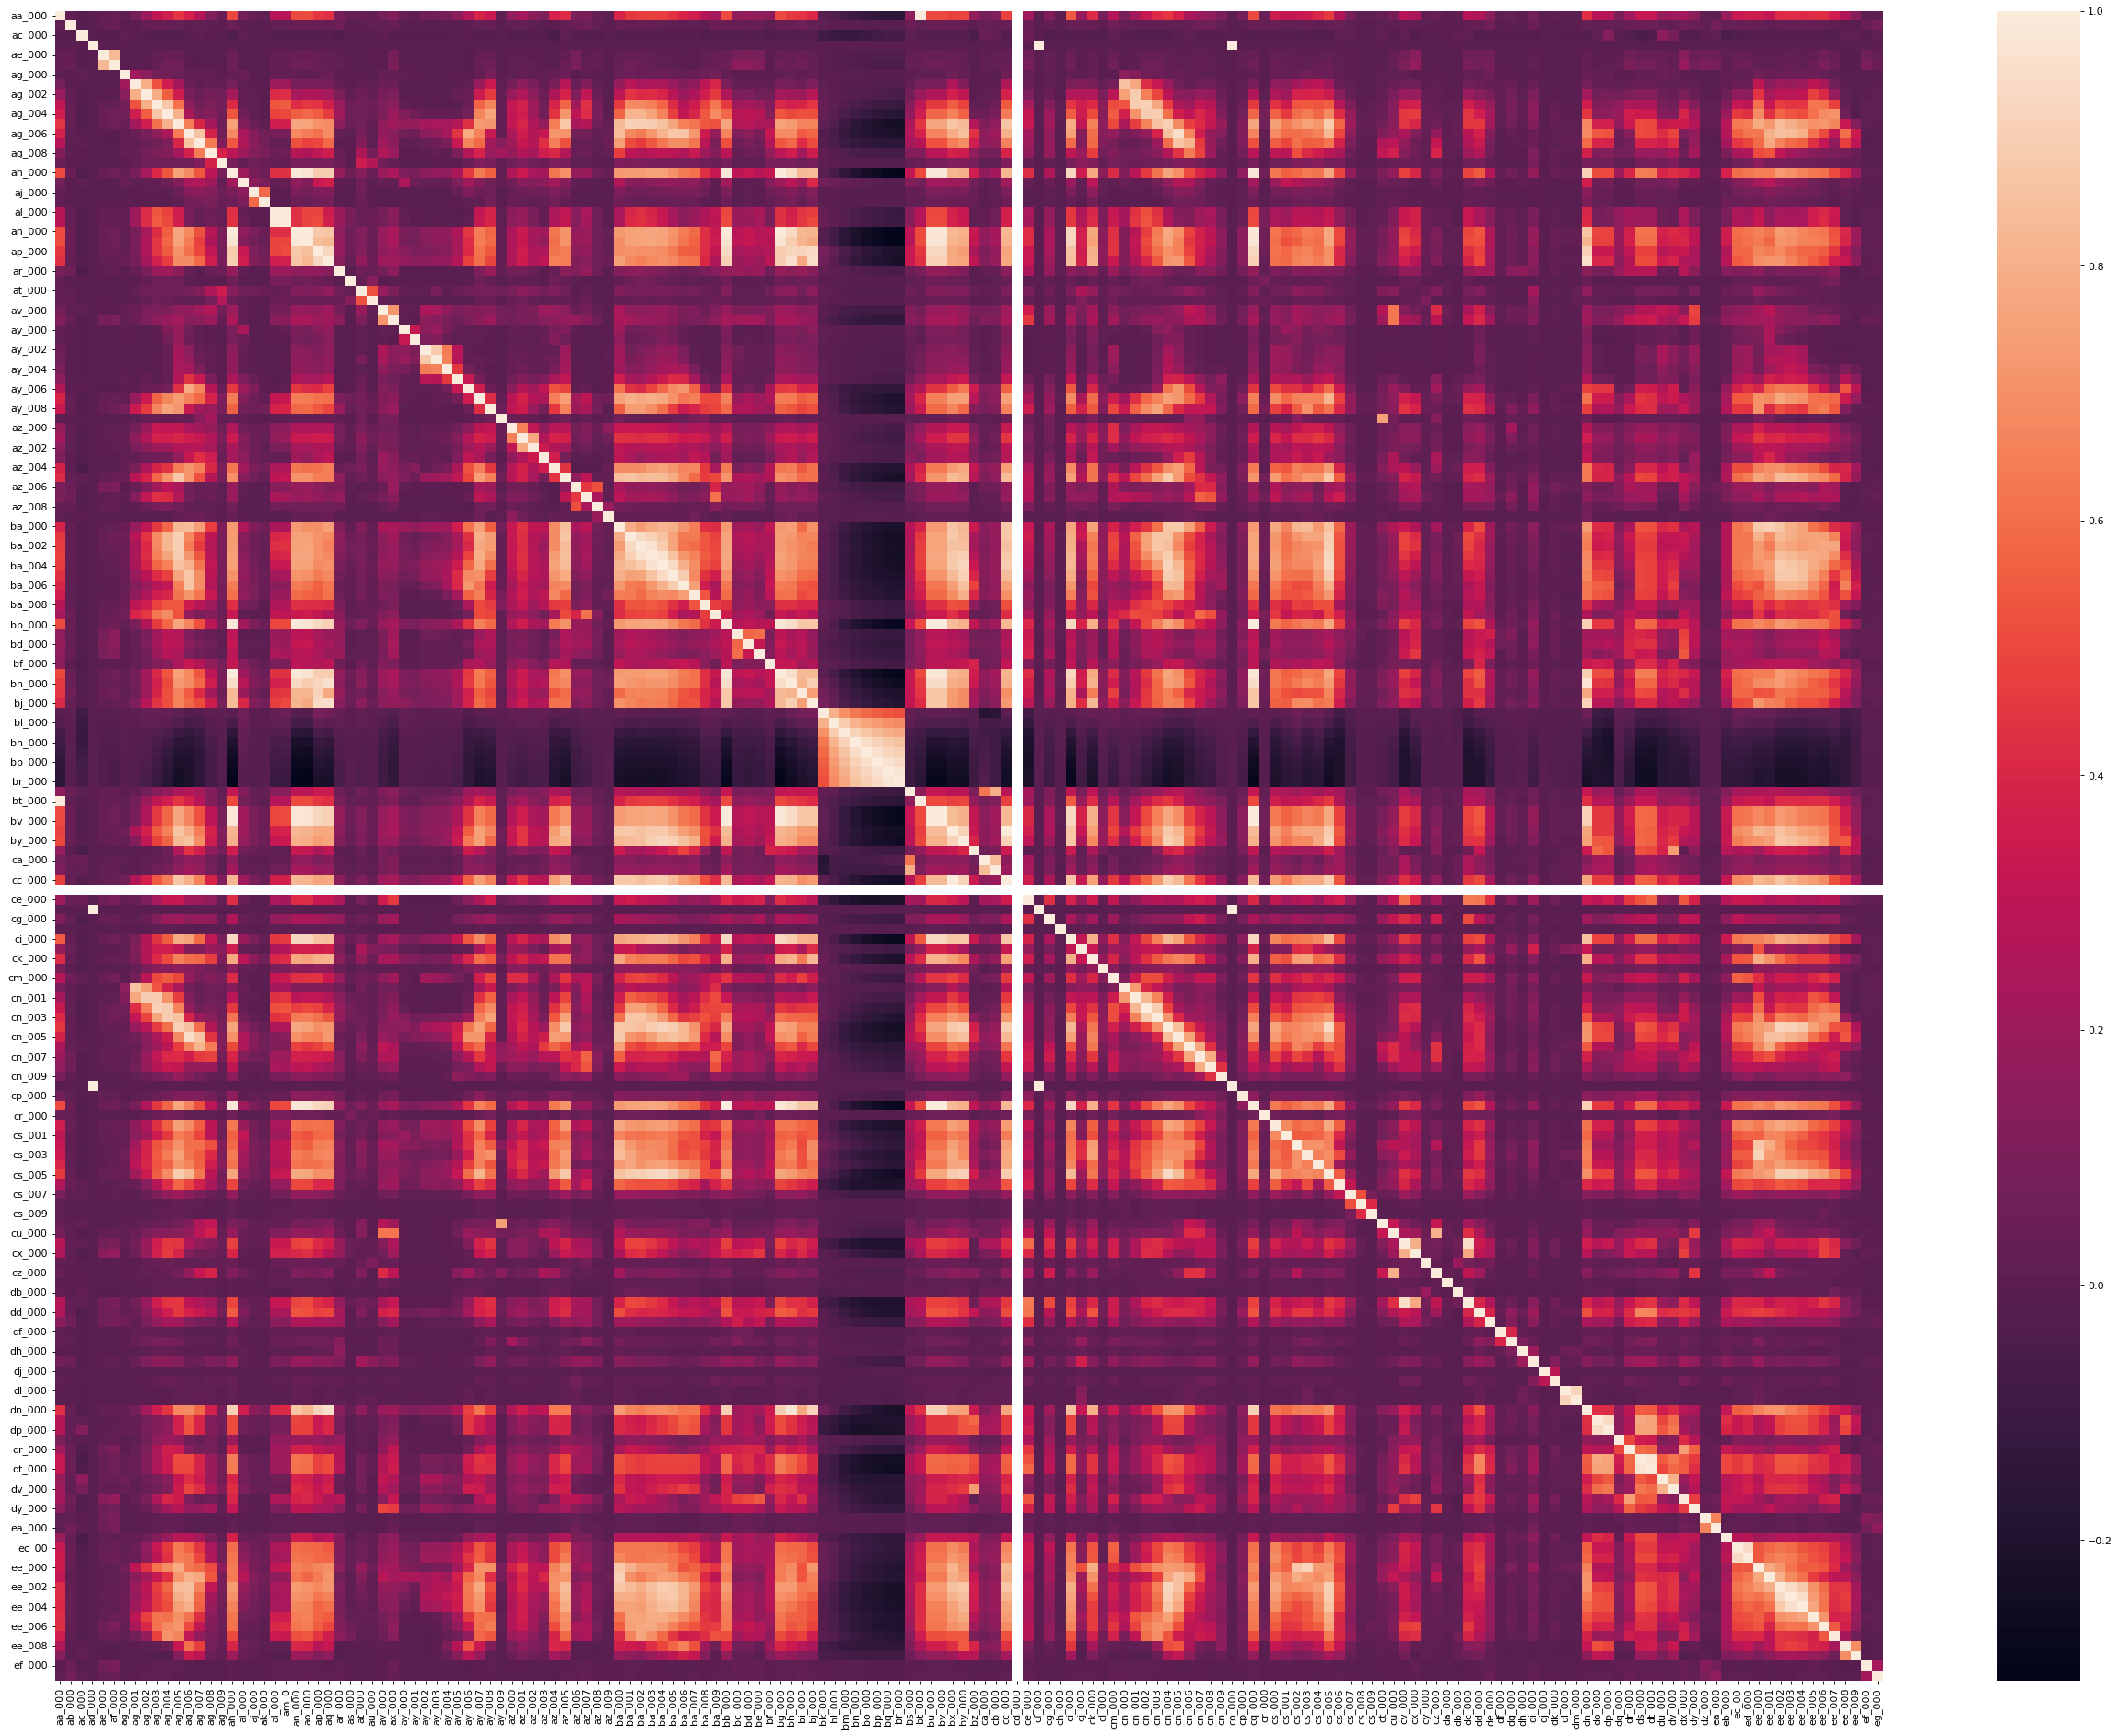

In [167]:
plt.figure(figsize=(40,30),dpi=80)
sns.heatmap(df_all_data.corr())

## Question 1.b.(iv)

Pick sqrt(170) features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [168]:
count=math.floor(np.sqrt(170))
count

13

In [169]:
sort_CV={k: v for k, v in sorted(CV.items(), key=lambda item: item[1])}
top_features=[x for x in list(sort_CV)[-count:]]
top_features.reverse()
top_features

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

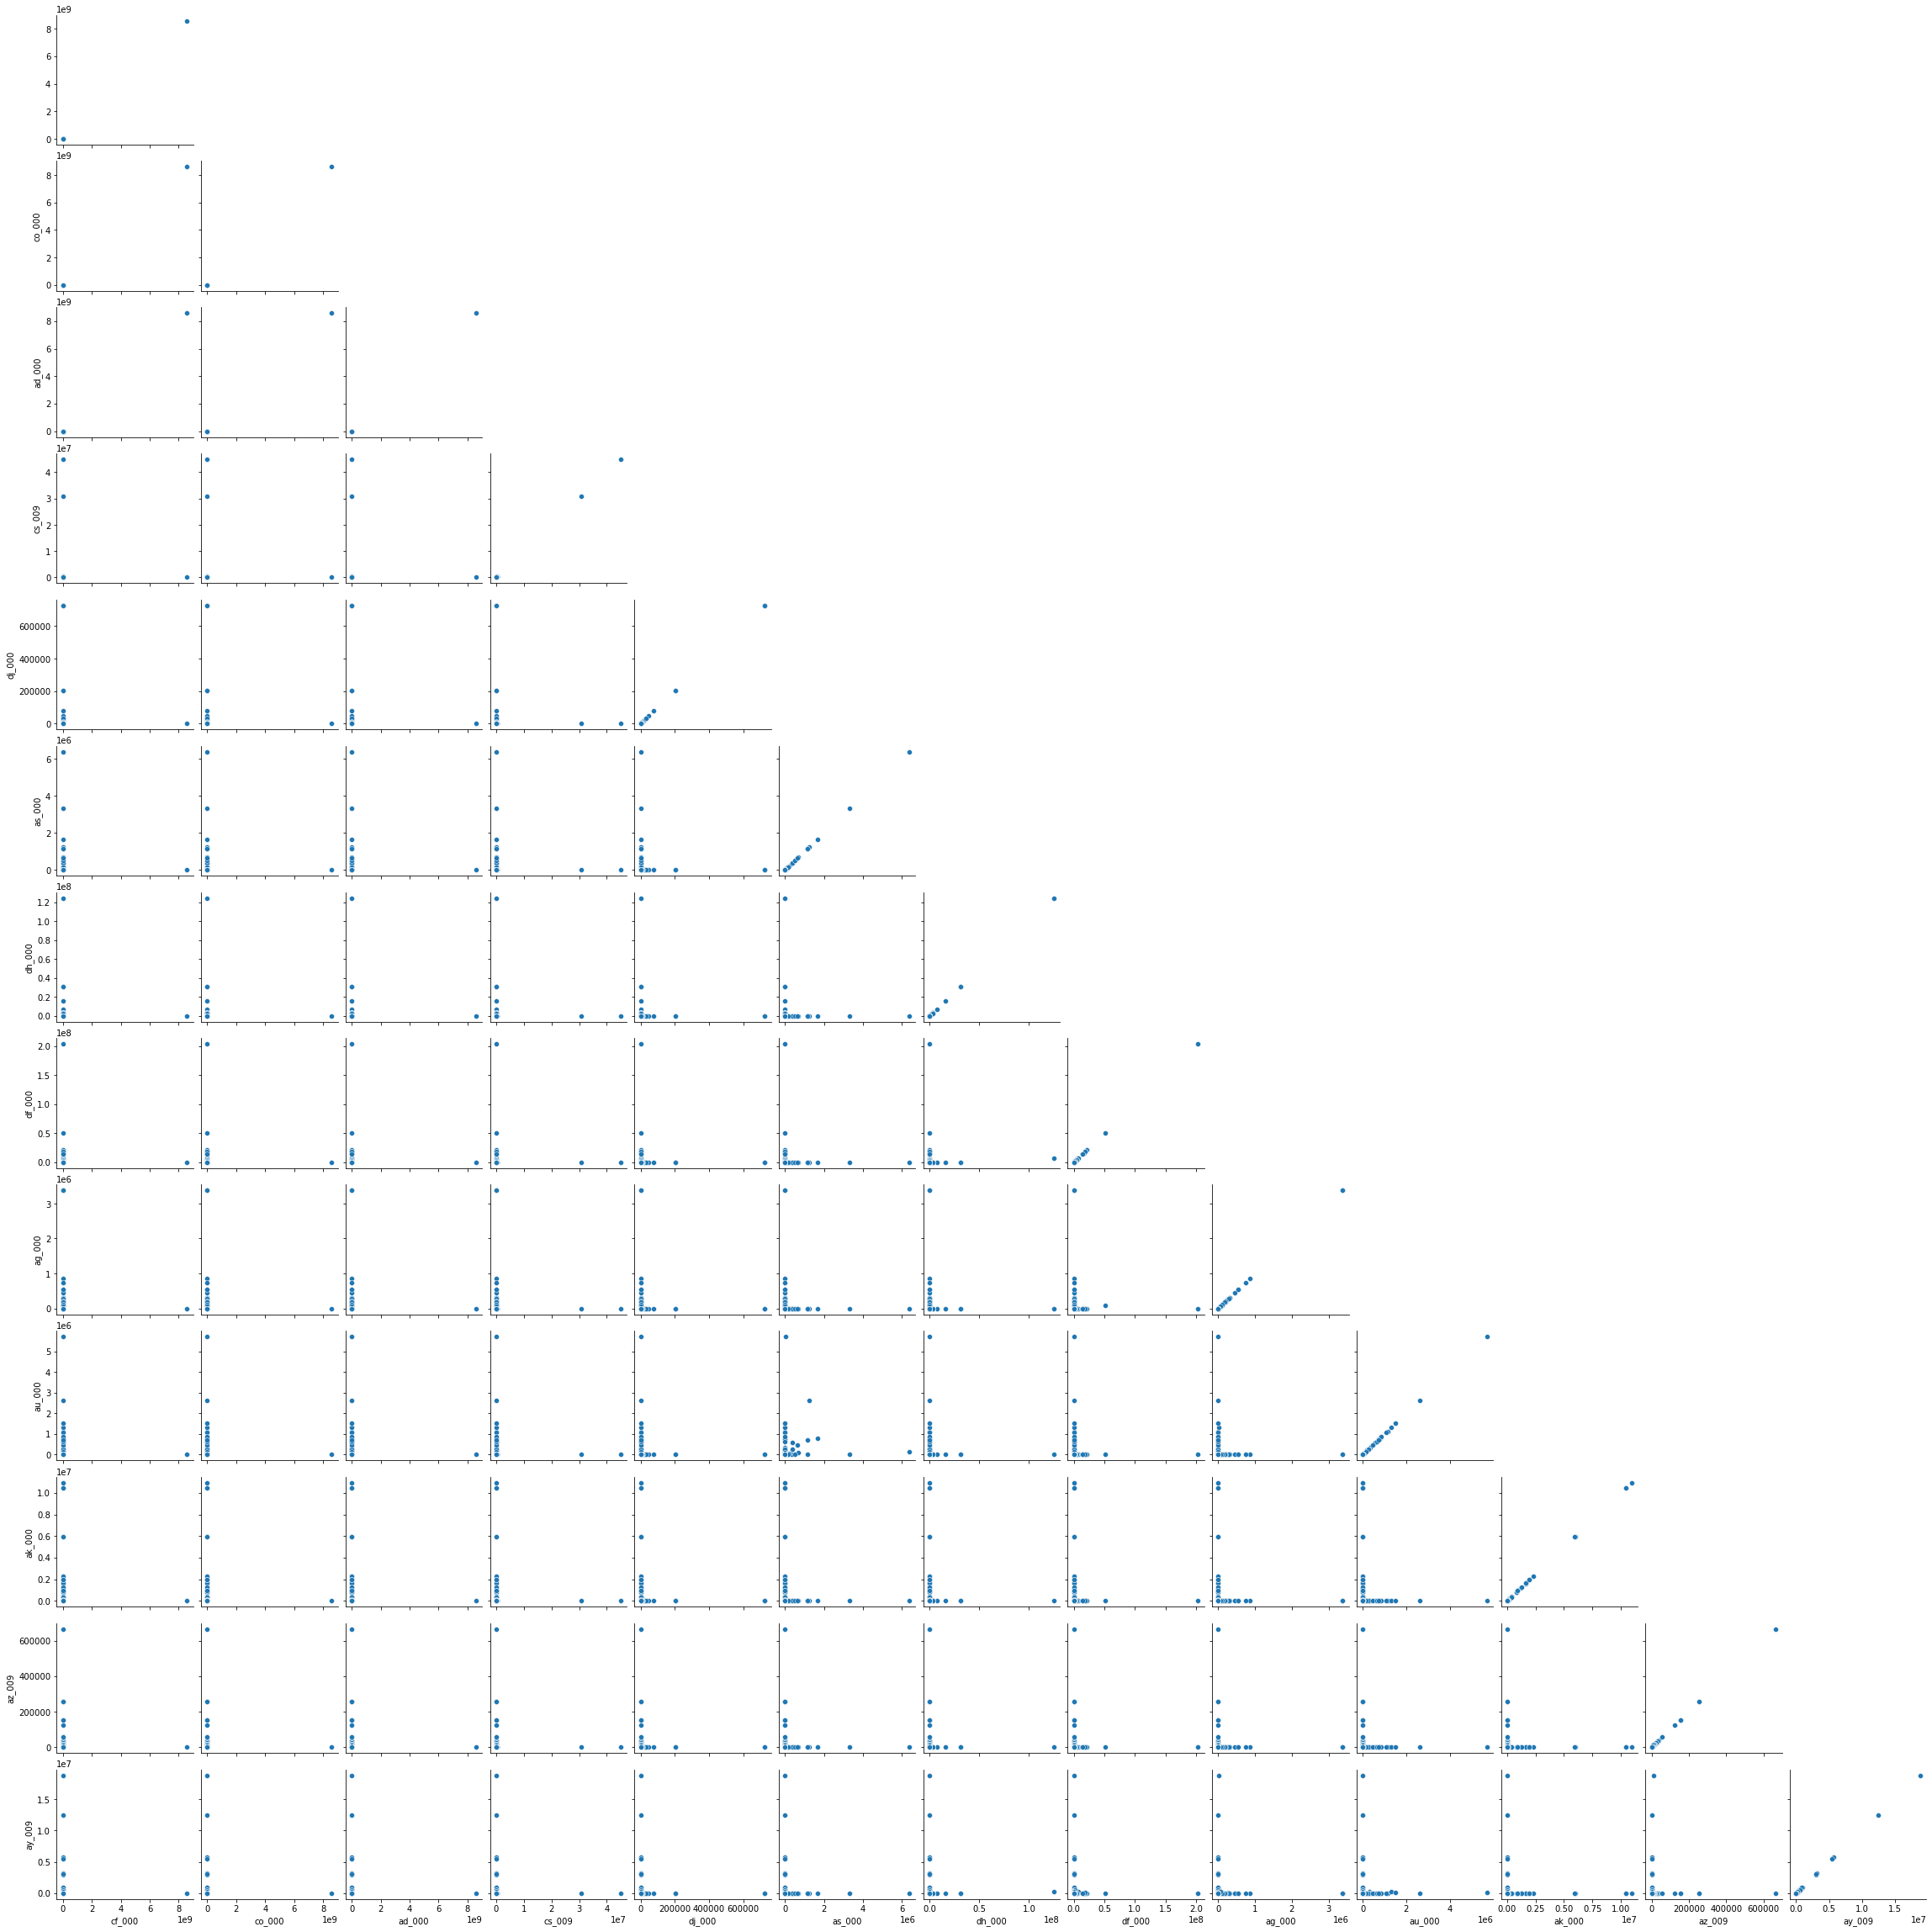

In [170]:
df_pairplot_data=df_all_data[top_features]

sns.pairplot(df_pairplot_data, diag_kind=None,corner=True)

**No, we cannot draw some conclusions from the pairplots.**

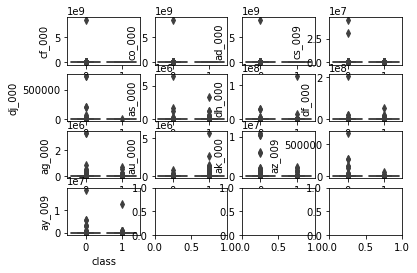

In [171]:
fit,axes=plt.subplots(4,4)
data=df_pairplot_data
for i,j in zip(range(13),axes.flat):
    sns.boxplot(y=data.iloc[:,i],x=label_data,ax=j)
plt.show()

## Question 1.b.(v)

Determine the number of positive and negative data. Is this data set imbal-
anced?

In [172]:
df_concat_data['class'].value_counts()


neg    74625
pos     1375
Name: class, dtype: int64

**Yes, the Data is highly imbalanced as the number of negative data points are much higher than positive data points.**

## Question 1.c

Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

In [173]:
X_train=df_train
Y_train=label_data[0:60000]
X_test=df_test
Y_test=label_data[60000:]

In [174]:
clf = RandomForestClassifier(n_estimators=100, random_state=0,oob_score=True)
clf.fit(X_train,Y_train)
#Training Set
ypred_train=clf.predict(X_train)

#Test Set
ypred_test=clf.predict(X_test)

##### For train set

[[59000     0]
 [    0  1000]]


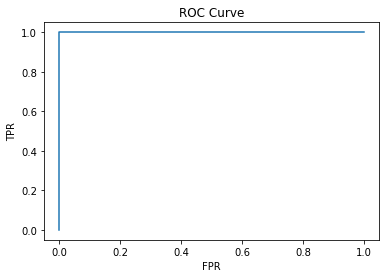

The AUC for Training Set is : 1.0
The Misclassification is: 0.0


In [175]:
conf_mat_train = confusion_matrix(Y_train,ypred_train)
print(conf_mat_train)

fpr,tpr,thresholds=metrics.roc_curve(Y_train, ypred_train)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print('The AUC for Training Set is :',metrics.auc(fpr,tpr))
print("The Misclassification is:",1-accuracy_score(Y_train, ypred_train))


##### For test set

[[15608    17]
 [  111   264]]


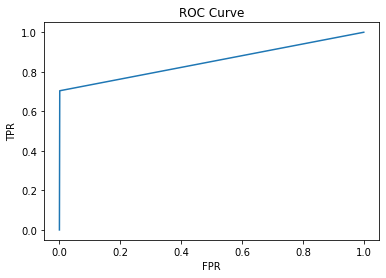

The AUC for Test Set is : 0.851456
The Misclassification is: 0.008000000000000007
The OOB test error is 0.006216666666666648


In [176]:
conf_mat_test = confusion_matrix(Y_test,ypred_test)
print(conf_mat_test)

fpr,tpr,thresholds=metrics.roc_curve(Y_test, ypred_test)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print('The AUC for Test Set is :',metrics.auc(fpr,tpr))
print("The Misclassification is:",1-accuracy_score(Y_test, ypred_test))
print("The OOB test error is",1-clf.oob_score_)

## Question 1.d

Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

In [177]:
clf_balanced = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced",oob_score=True)
clf_balanced.fit(X_train,Y_train)
#Training Set
ypred_train_balanced=clf_blanced.predict(X_train)

#Test Set
ypred_test_balanced=clf_blanced.predict(X_test)

##### For training set

[[59000     0]
 [    0  1000]]


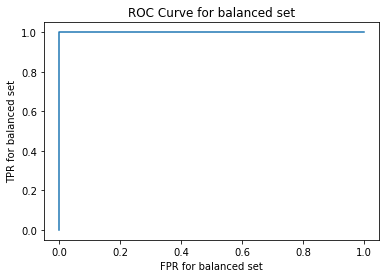

The AUC for Training Set for the balanced set is : 1.0
The Misclassification for the balanced set is: 0.0


In [178]:
conf_mat_train_balanced = confusion_matrix(Y_train,ypred_train_balanced)
print(conf_mat_train_balanced)

fpr,tpr,thresholds=metrics.roc_curve(Y_train, ypred_train_balanced)
plt.plot(fpr,tpr)
plt.title("ROC Curve for balanced set")
plt.xlabel("FPR for balanced set")
plt.ylabel("TPR for balanced set")
plt.show()
print('The AUC for Training Set for the balanced set is :',metrics.auc(fpr,tpr))
print("The Misclassification for the balanced set is:",1-accuracy_score(Y_train, ypred_train_balanced))


##### For testing data

[[15614    11]
 [  166   209]]


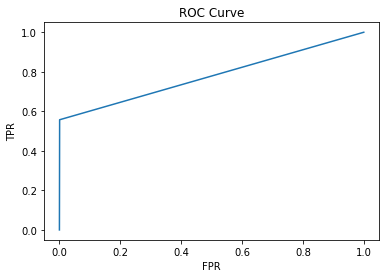

The AUC for Test Set is : 0.7783146666666666
The Misclassification is: 0.011062499999999975
The OOB test error is 0.007449999999999957


In [179]:
conf_mat_test_balanced = confusion_matrix(Y_test,ypred_test_balanced)
print(conf_mat_test_balanced)

fpr,tpr,thresholds=metrics.roc_curve(Y_test, ypred_test_balanced)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print('The AUC for Test Set is :',metrics.auc(fpr,tpr))
print("The Misclassification is:",1-accuracy_score(Y_test, ypred_test_balanced))
print("The OOB test error is",1-clf_balanced.oob_score_)

**Once the class imbalance is adddressed, the test error rate and out of the bag error rater is increased.But , the training error will remain the same.**

## Question 1.b.e

XGBoost and Model Trees

In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can
be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has
P
j bjXj > s. as the decision rule). Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.

One of the methods that can be used at each node is Logistic Regression. Because
the number of variables is large in this problem, one can use L1-penalized logistic
regression at each node. You can use XGBoost to fit the model tree. Determine
alpha (the regularization term) using cross-validation. Train the model for the APS
data set without compensation for class imbalance. Use one of 5 fold, 10 fold,
and leave-one-out cross validation methods to estimate the error of your trained
model and compare it with the test error. Report the Confusion Matrix, ROC,
and AUC for training and test sets.

In [180]:
xgboost= xgb.XGBClassifier(objective="binary:logistic")
grid_parameters={"reg_alpha":[1e-4,1e-3,1e-2,1e-1,1]}
grid_search_cv= GridSearchCV(xgboost,grid_parameters,cv=5,scoring="roc_auc")
grid_search_cv.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='roc_auc')

In [181]:
cv_scr=grid_search_cv.best_score_
print("The 5-cross fold error is :",1-cv_scr)

The 5-cross fold error is : 0.009078898305084793


In [182]:
grid_search_cv.best_params_

{'reg_alpha': 1}

##### For train set

In [183]:
ypred_best_train=grid_search_cv.predict(X_train)
print("The accuracy of the model for the train set is:",1-accuracy_score(Y_train,ypred_best_train))

The accuracy of the model for the train set is: 1.666666666666483e-05


##### For test set

In [184]:
ypred_best_test=grid_search_cv.predict(X_test)
print("The accuracy of the model for the test set is:",1-accuracy_score(Y_test,ypred_best_test))

The accuracy of the model for the test set is: 0.005437499999999984


In [185]:
print("The confusion matrix for Training set is:")
confusion_matrix(Y_train,ypred_best_train)

The confusion matrix for Training set is:


array([[59000,     0],
       [    1,   999]], dtype=int64)

In [186]:
print("The confusion matrix for Testing set is:")
confusion_matrix(Y_test,ypred_best_test)

The confusion matrix for Testing set is:


array([[15613,    12],
       [   75,   300]], dtype=int64)

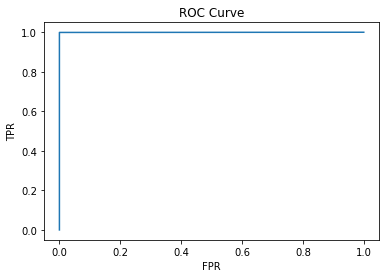

THE AUC for training set is : 0.9995


In [187]:
### ROC and AUC Curve

fpr_best_train,tpr_best_train,thresholds_best_train=metrics.roc_curve(Y_train,ypred_best_train)
plt.plot(fpr_best_train,tpr_best_train)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print("THE AUC for training set is :",metrics.auc(fpr_best_train,tpr_best_train))

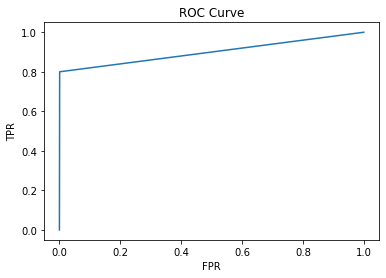

THE AUC for testing set is : 0.899616


In [188]:
# ROC and AUC for Testing set
fpr_best_test,tpr_best_test,thresholds_best_test=metrics.roc_curve(Y_test,ypred_best_test)
plt.plot(fpr_best_test,tpr_best_test)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print("THE AUC for testing set is :",metrics.auc(fpr_best_test,tpr_best_test))

**the error obtained by the 5-cross validation is more than the test error.**

## Question 1.b.f

Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo-
gistic regression at each node using the pre-processed data and repeat 1e. Do not
forget that there is a right and a wrong way of cross validation here. Compare
the uncompensated case with SMOTE case.

In [189]:
pipeline= Pipeline(steps=[
                            ['smote',SMOTE(random_state=42)],
                            ['scaler',MinMaxScaler()],
                            ['classifier',xgb.XGBClassifier(objective="binary:logistic")]])

grid_parameters_smote= {"classifier__reg_alpha" :[1e-4,1e-3,1e-2,1e-1,1]}

grid_Search_smote=GridSearchCV(estimator=pipeline,param_grid=grid_parameters_smote,cv=5,scoring='roc_auc')
grid_Search_smote.fit(X_train,Y_train)
                   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['scaler', MinMaxScaler()],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None...
                                                      max_bin=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...)]]),
             param_grid={'classifier__reg_alpha': [0.0001, 0.001, 0.01, 0.1,
                                                   1]},
             scoring='roc_auc')

In [190]:
cv_score_smote=grid_Search_smote.best_score_
print("The 5fold cross validation error after SMOTE is:",1-cv_score_smote)

The 5fold cross validation error after SMOTE is: 0.010100042372881313


In [191]:
print("The best regularization form is:",grid_Search_smote.best_params_)

The best regularization form is: {'classifier__reg_alpha': 1}


##### For Training set

In [192]:
ypred_smote_train=grid_Search_smote.predict(X_train)
print("The training error after SMOTE is:",1-accuracy_score(Y_train,ypred_smote_train))

The training error after SMOTE is: 3.333333333332966e-05


In [193]:
confusion_matrix(Y_train,ypred_smote_train)

array([[59000,     0],
       [    2,   998]], dtype=int64)

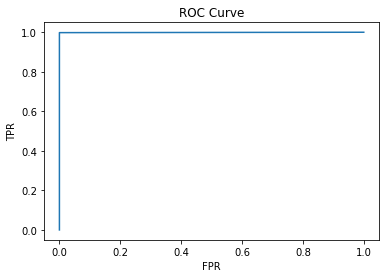

The AUC for training set: 0.999


In [194]:
fpr_smote_train,tpr_smote_train,thresholds_smote_train=metrics.roc_curve(Y_train,ypred_smote_train)
plt.plot(fpr_smote_train,tpr_smote_train)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print("The AUC for training set:",metrics.auc(fpr_smote_train,tpr_smote_train))

##### For Test Data

In [195]:
ypred_smote_test=grid_Search_smote.predict(X_test)
print("The testing error after SMOTE is:",1-accuracy_score(Y_test,ypred_smote_test))

The testing error after SMOTE is: 0.0068749999999999645


In [196]:
confusion_matrix(Y_test,ypred_smote_test)

array([[15580,    45],
       [   65,   310]], dtype=int64)

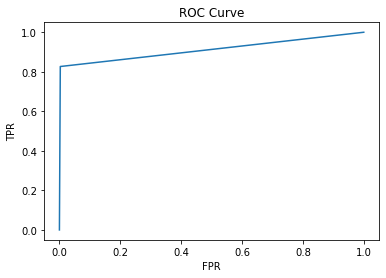

The AUC for test set: 0.9118933333333333


In [197]:
fpr_smote_test,tpr_smote_test,thresholds_smote_test=metrics.roc_curve(Y_test,ypred_smote_test)
plt.plot(fpr_smote_test,tpr_smote_test)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print("The AUC for test set:",metrics.auc(fpr_smote_test,tpr_smote_test))

**After the class imbalance was compensated with SMOTE, overall test error increased. However, model performs well on positive cases unlike previous model which performed poorly on positive class.**

## ISLR 6.6.3

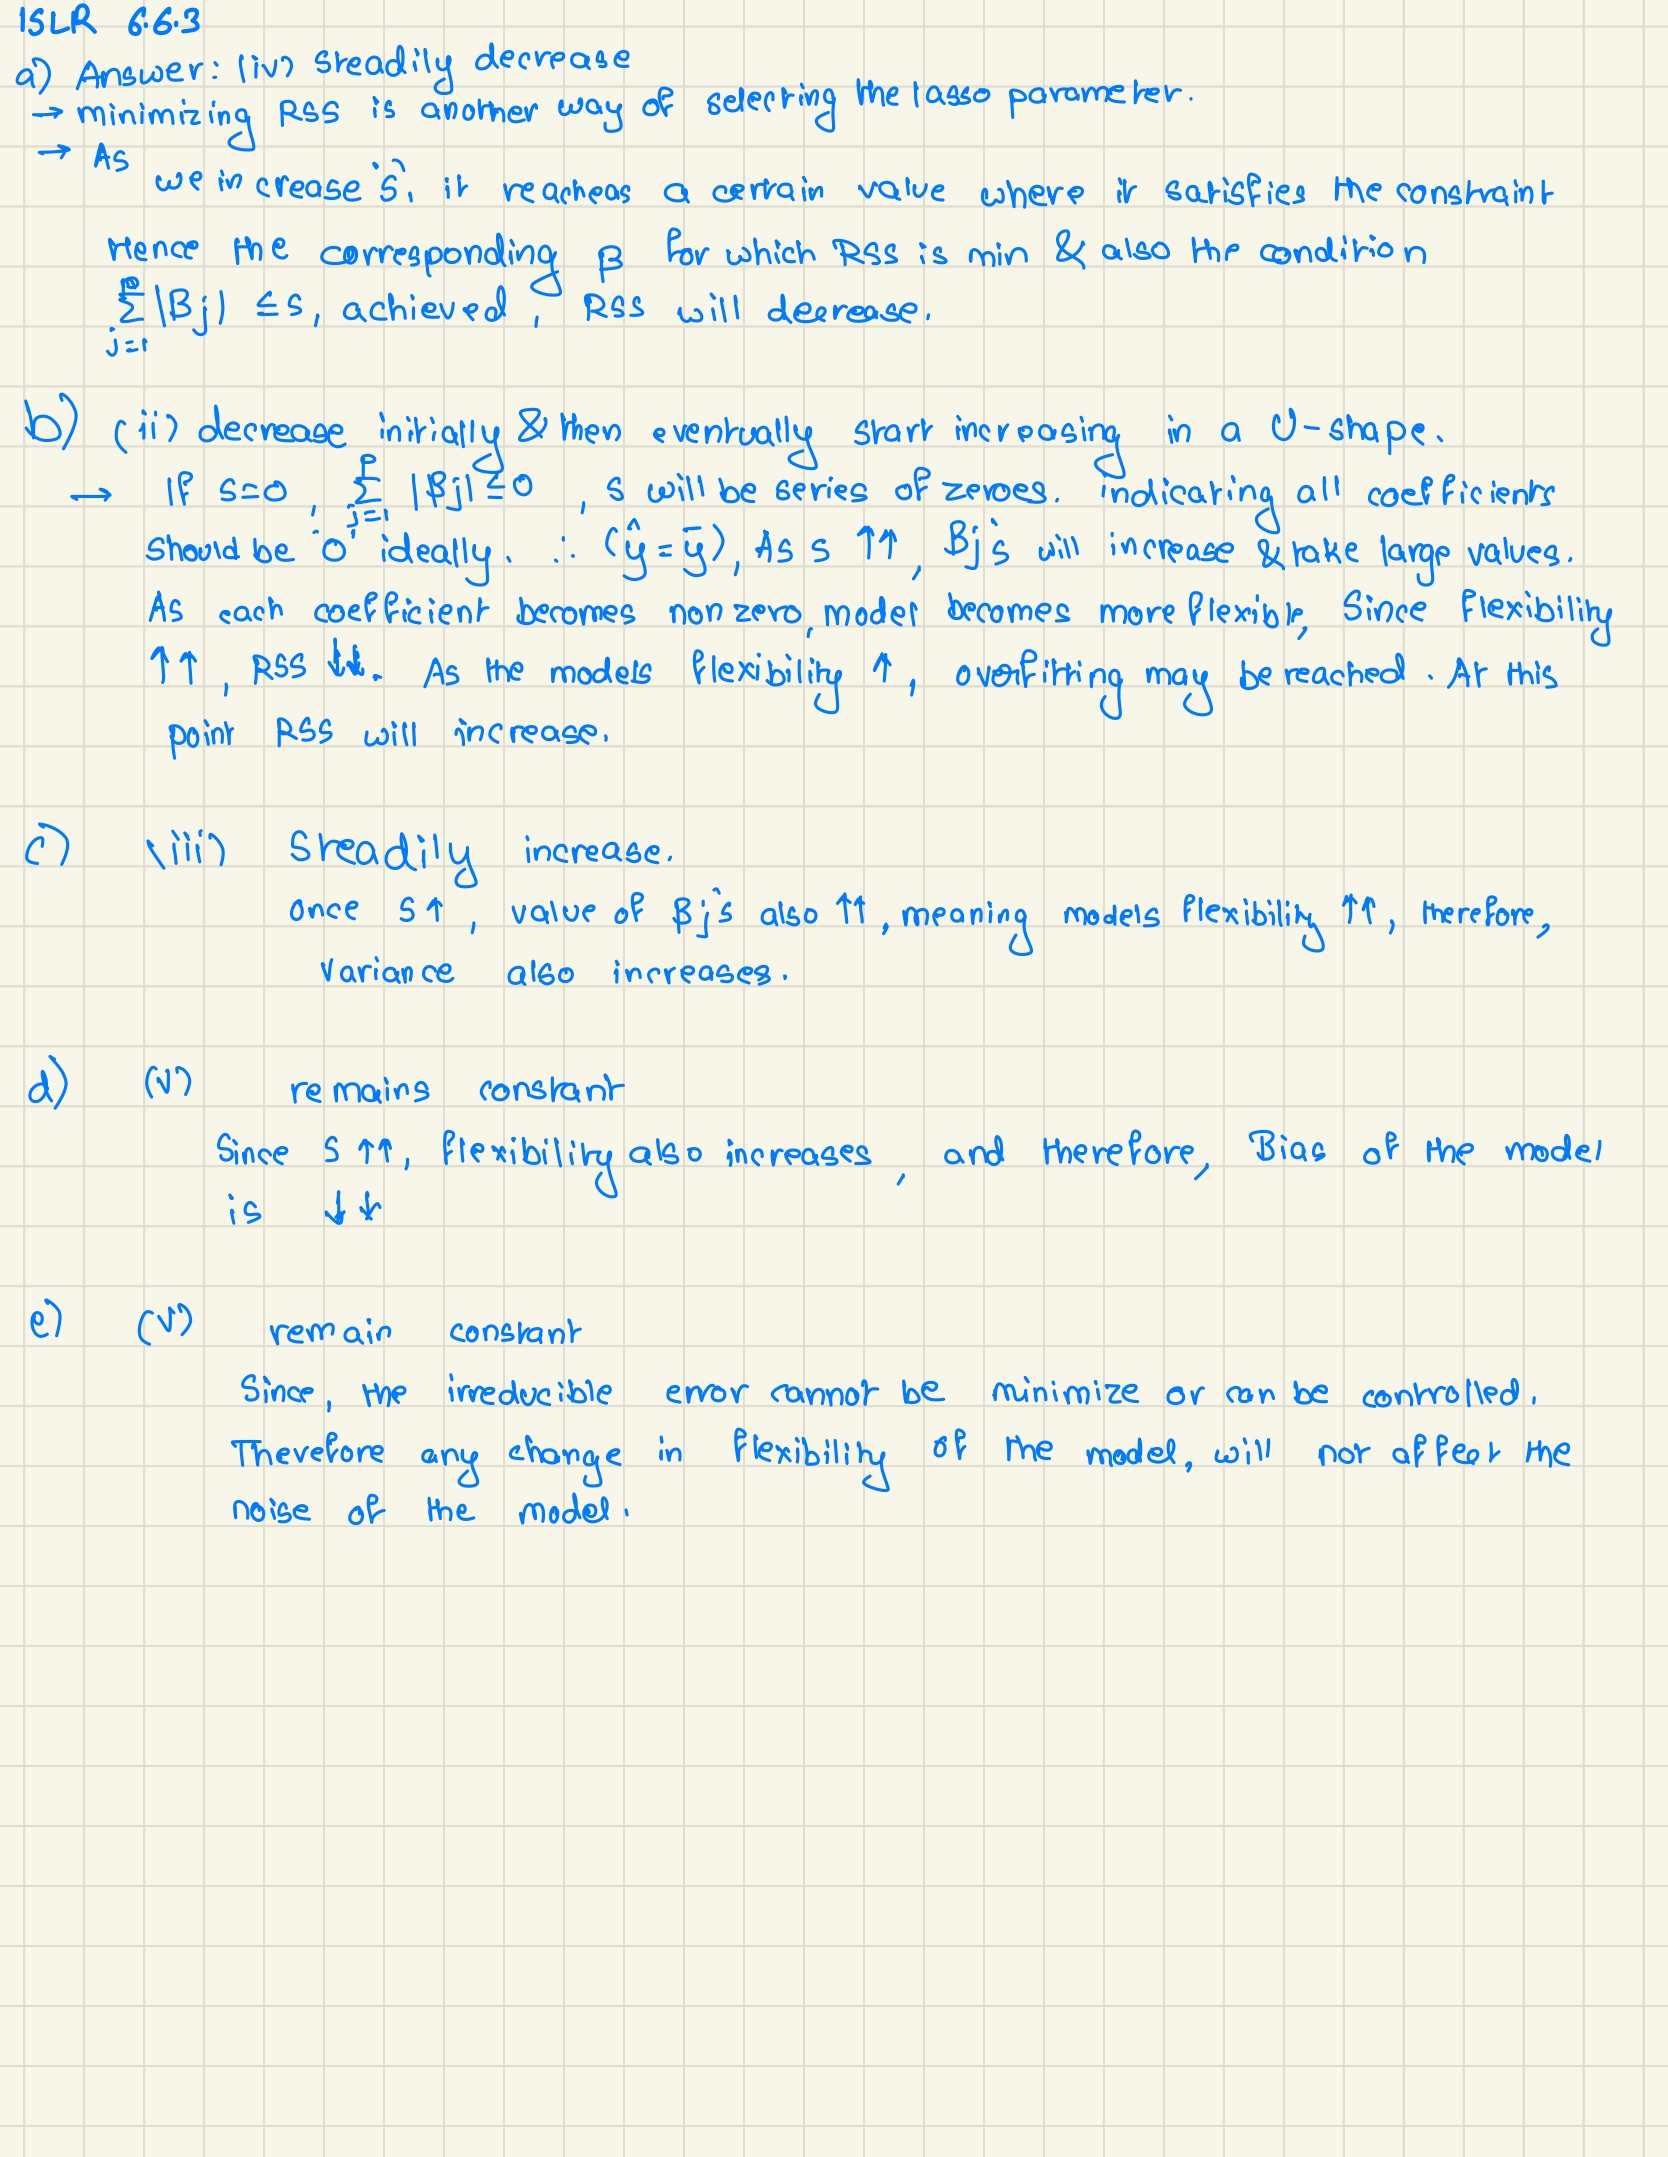

## ISLR 6.6.5

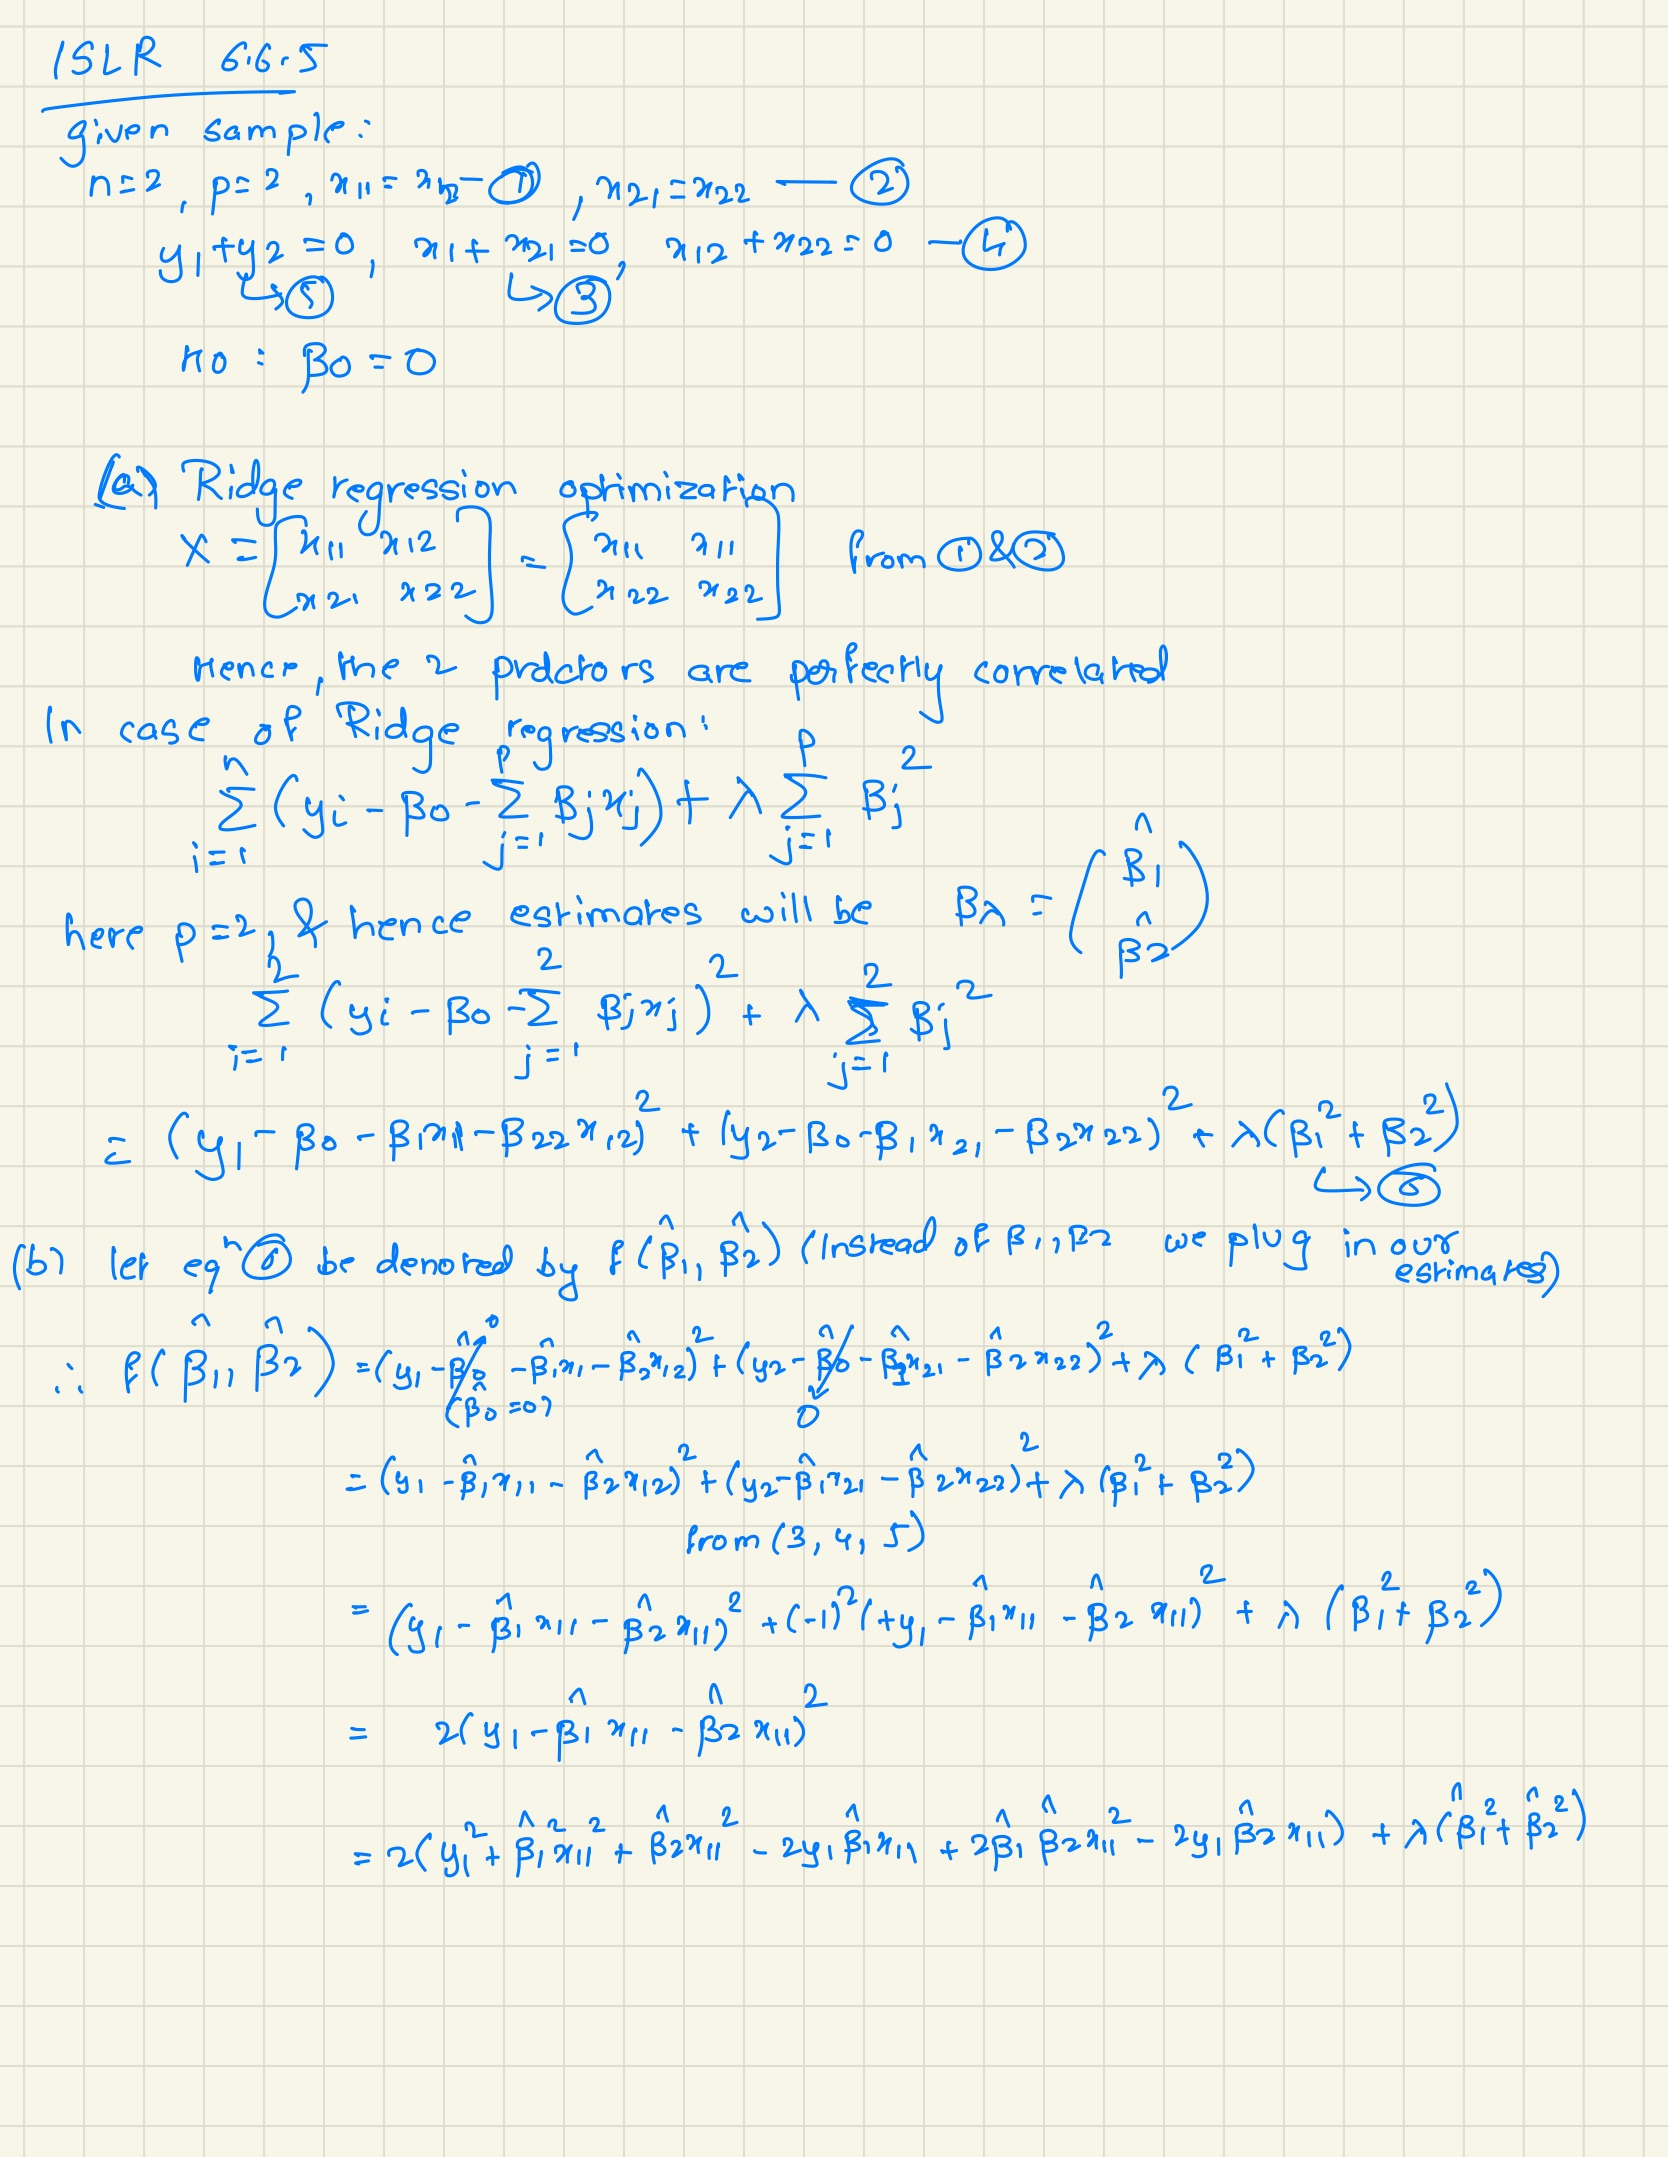

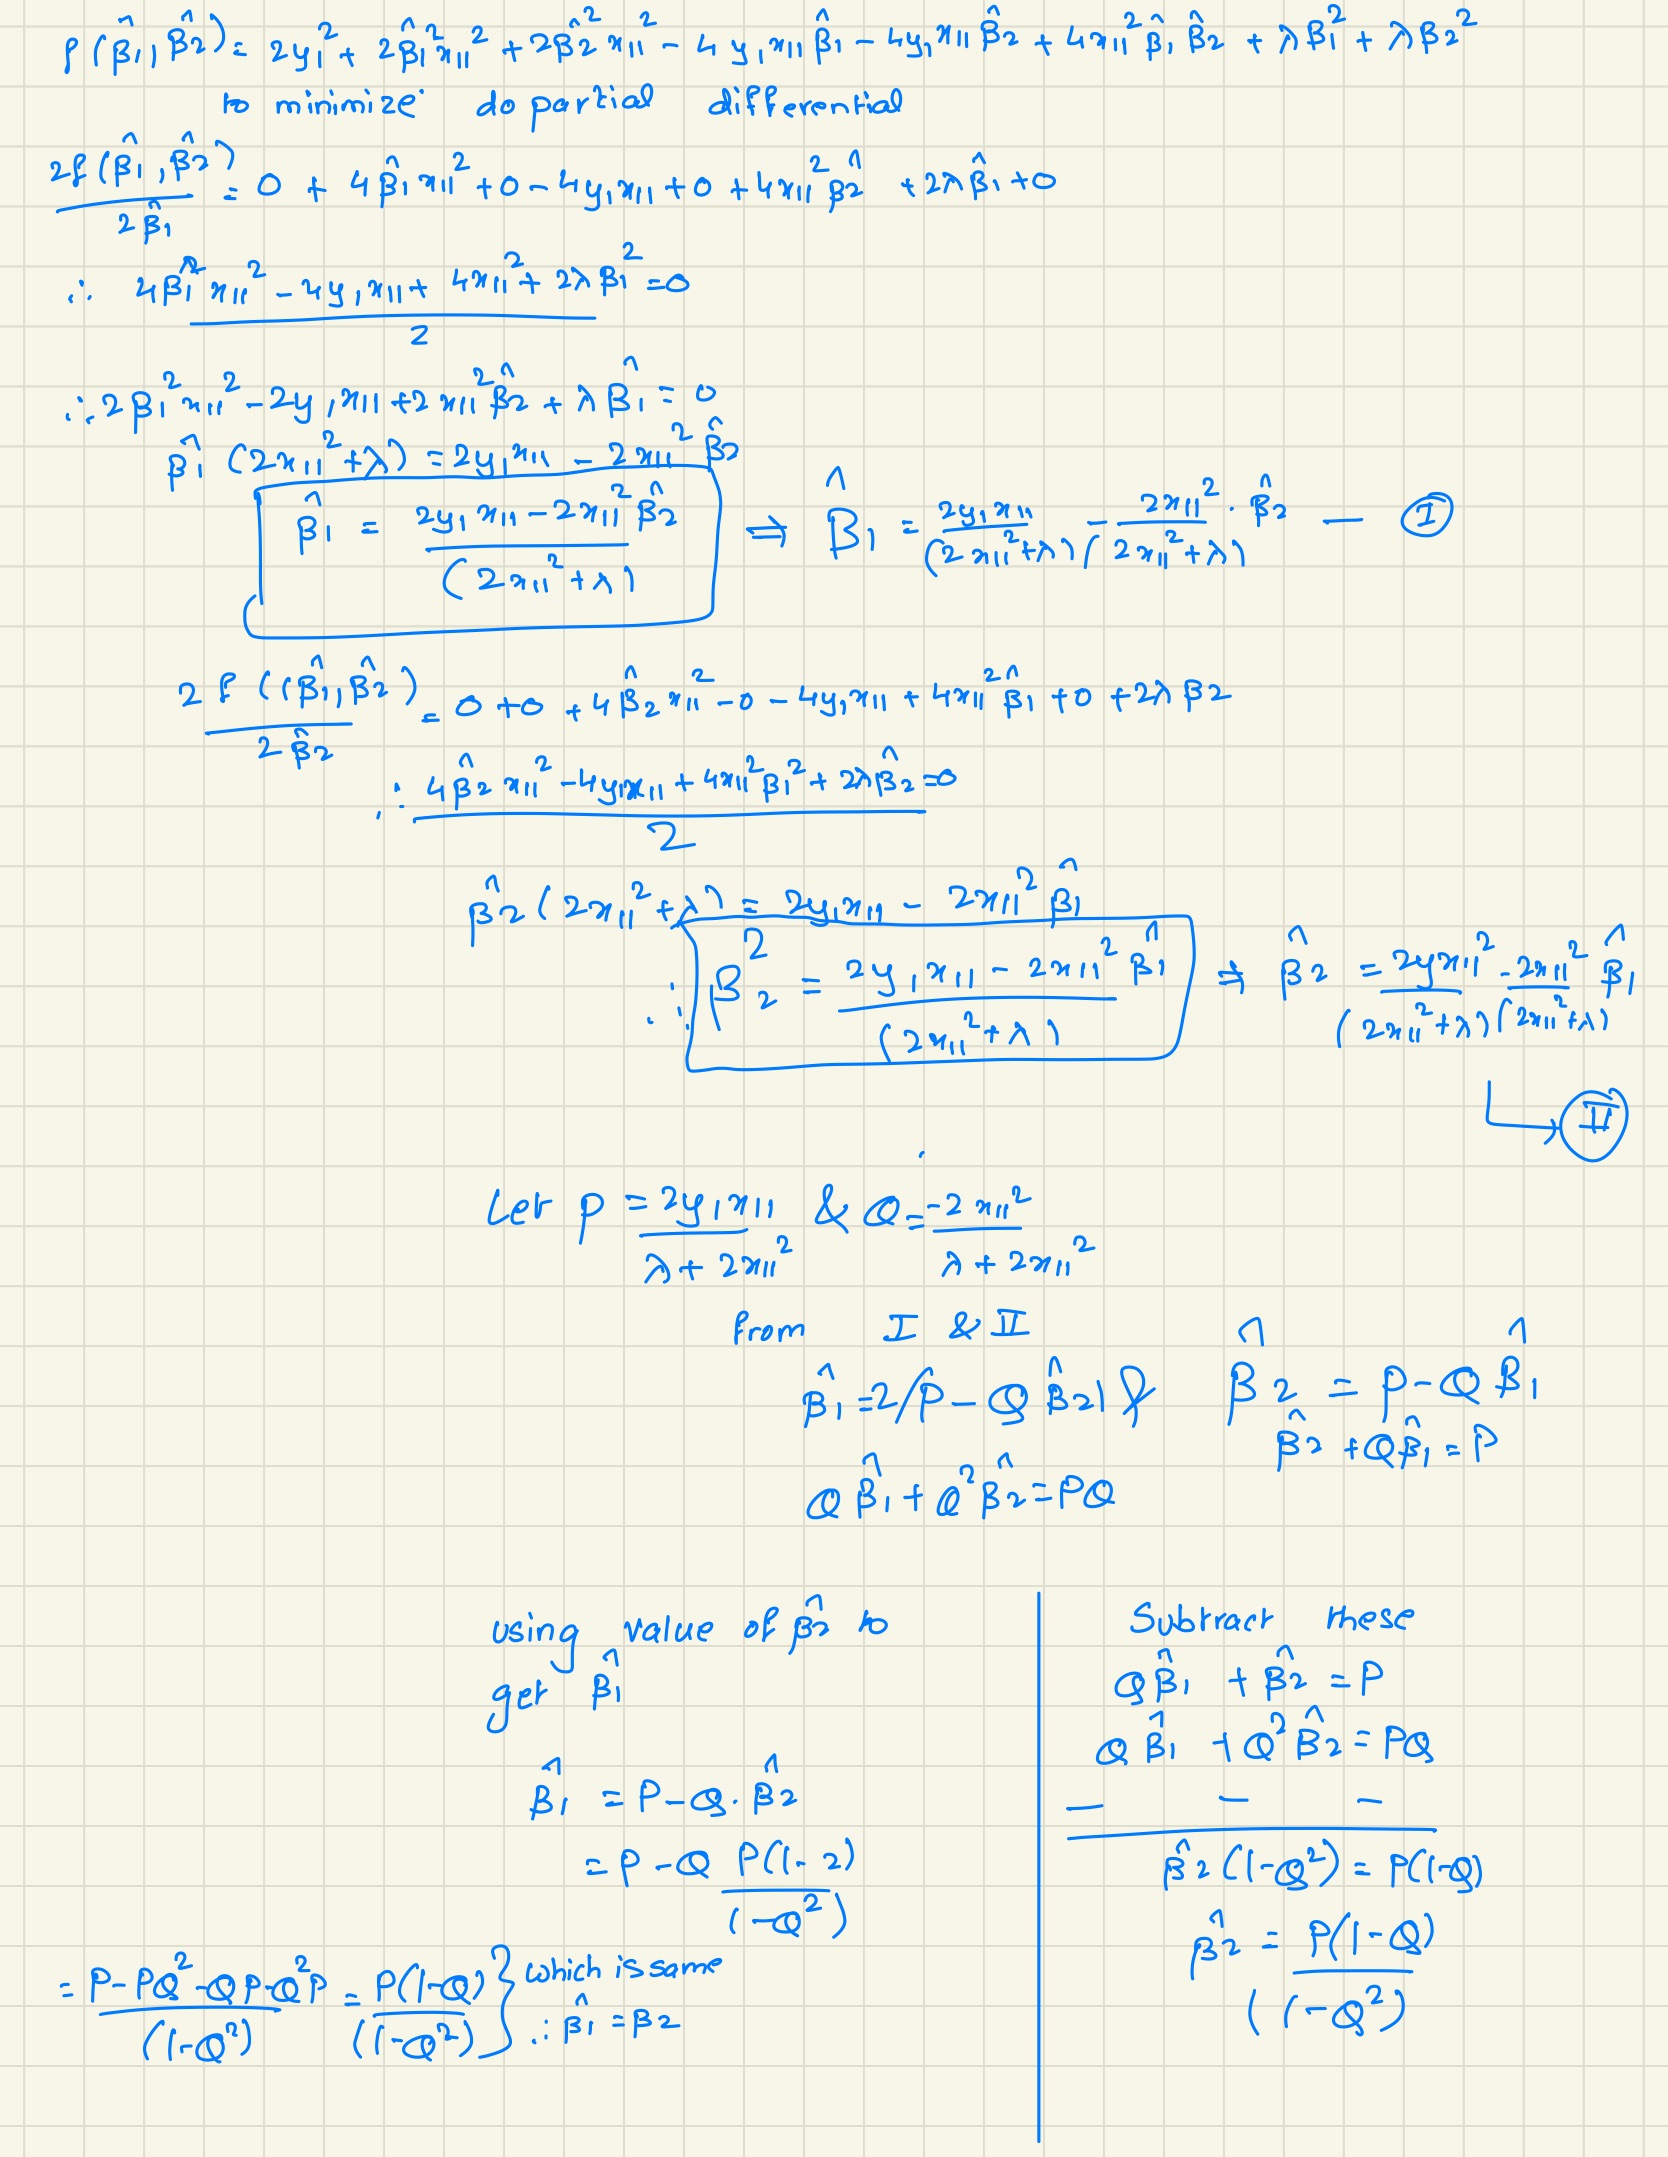

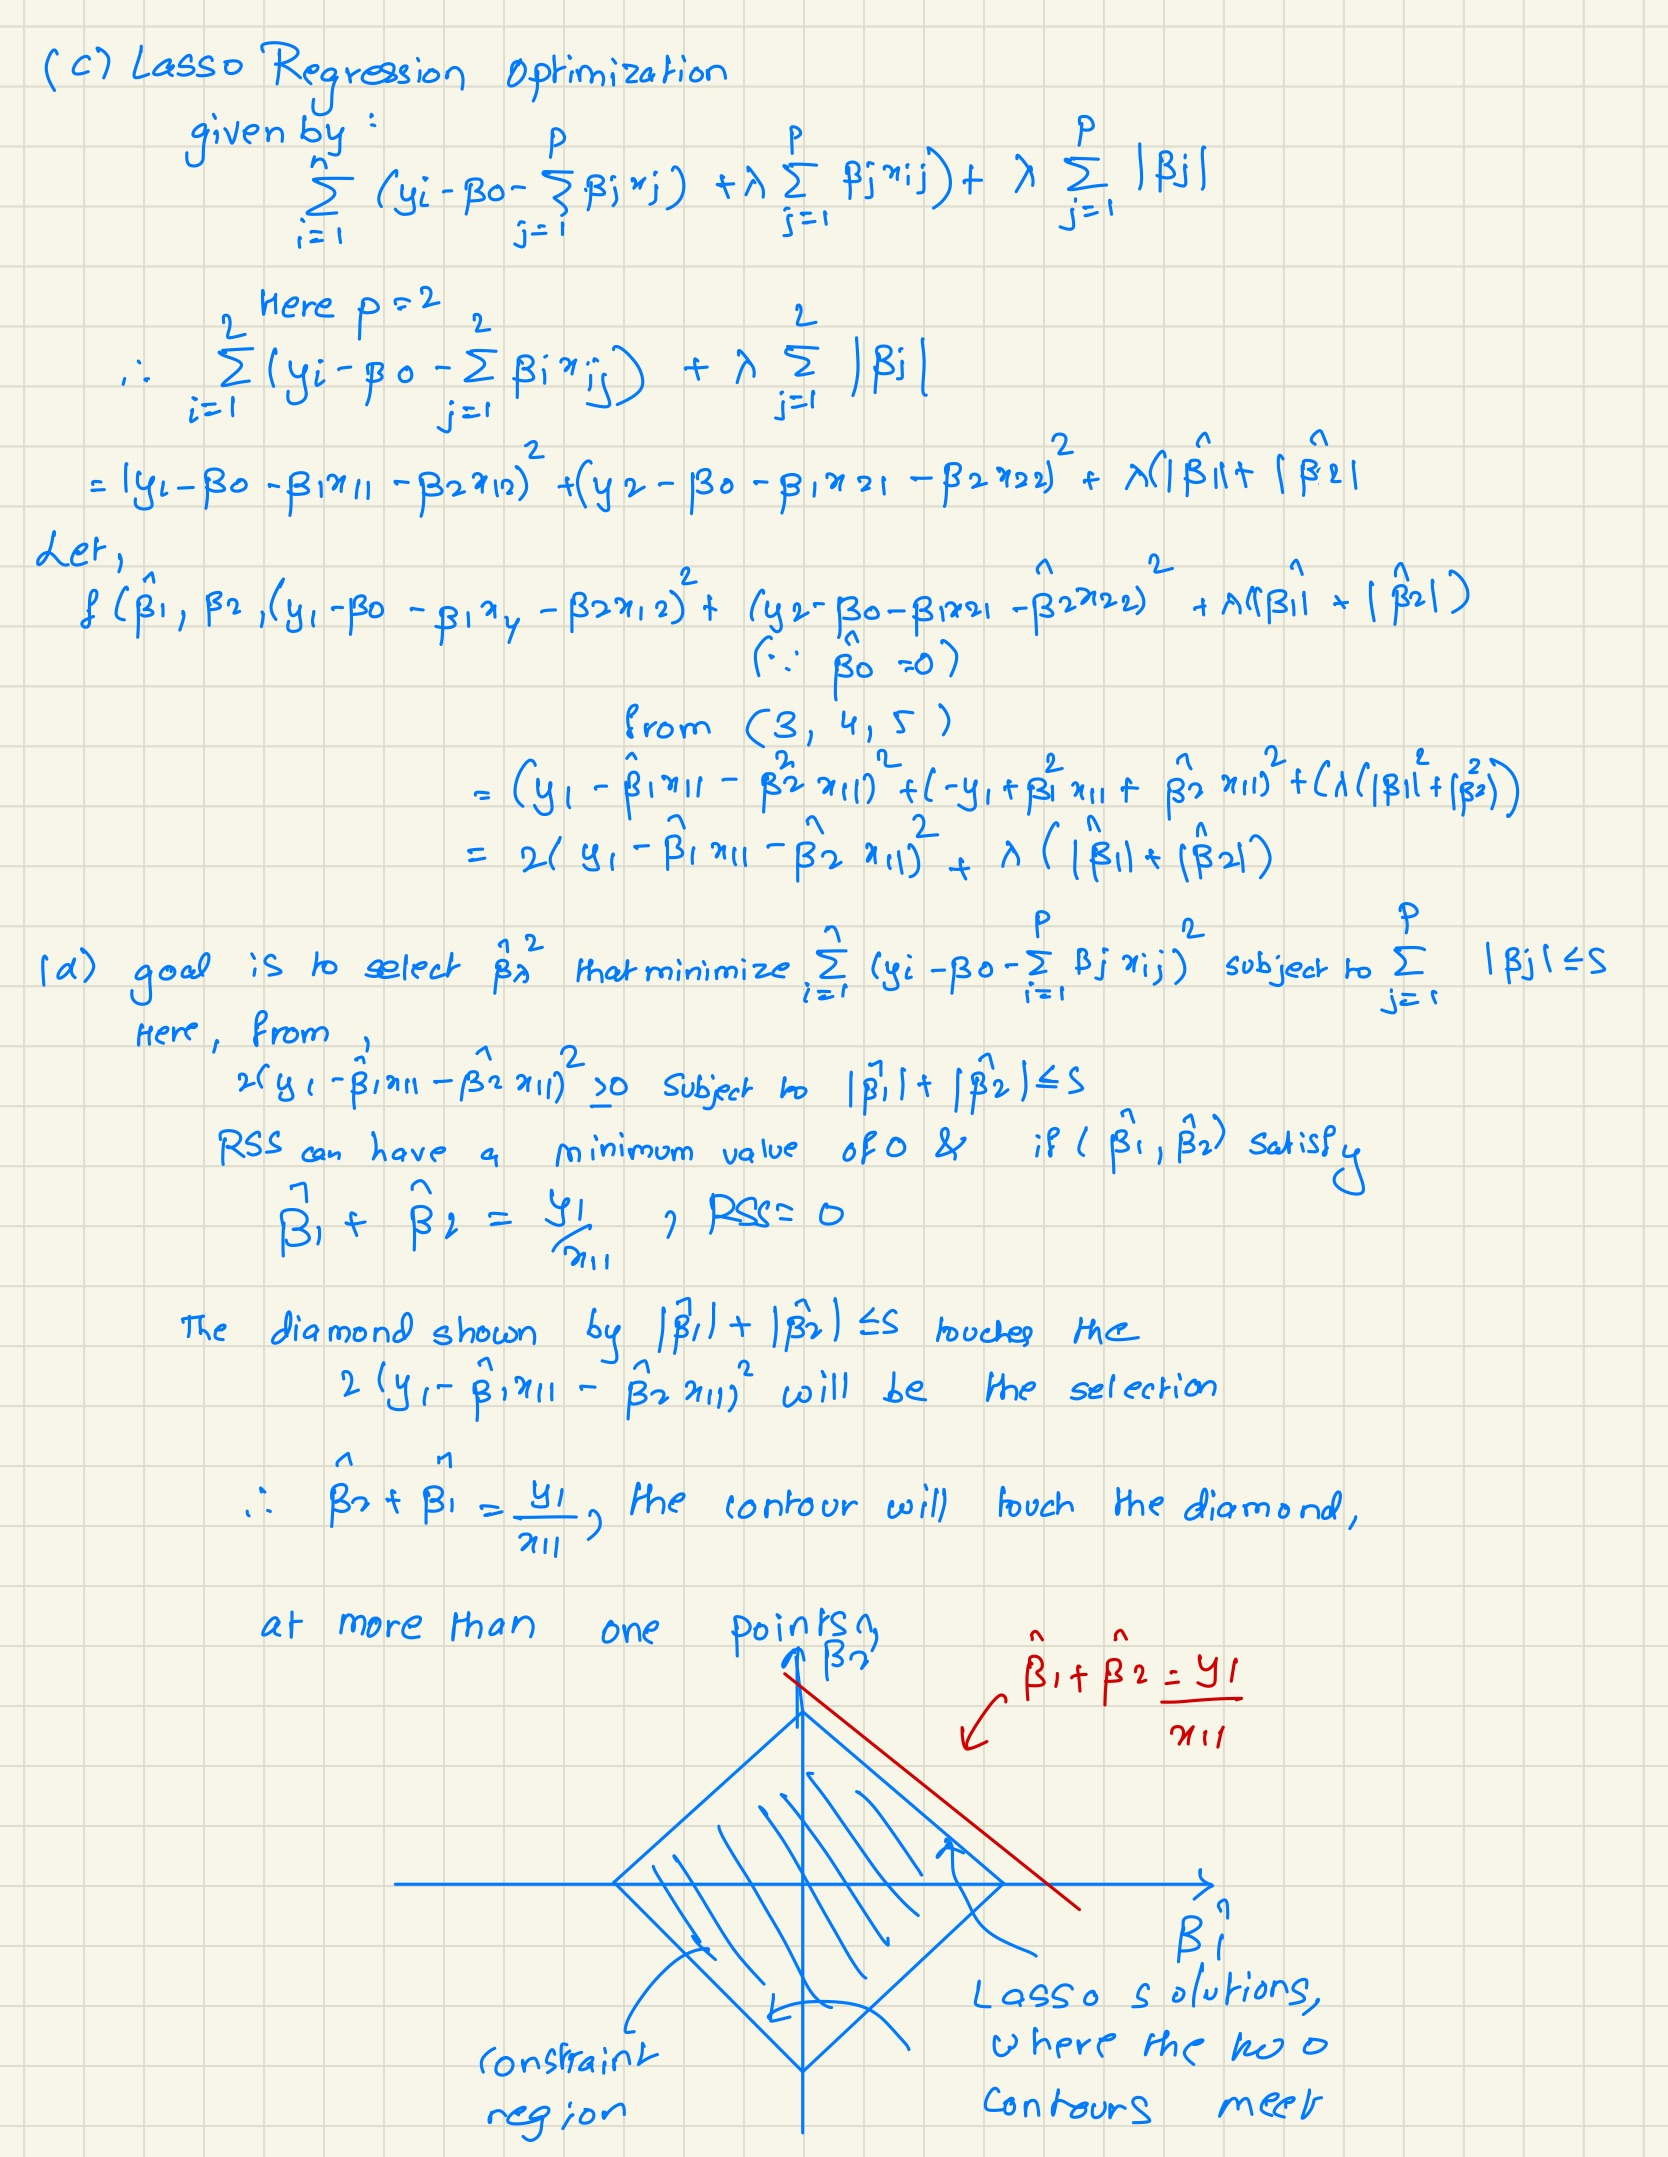

## ISLR 8.4.5

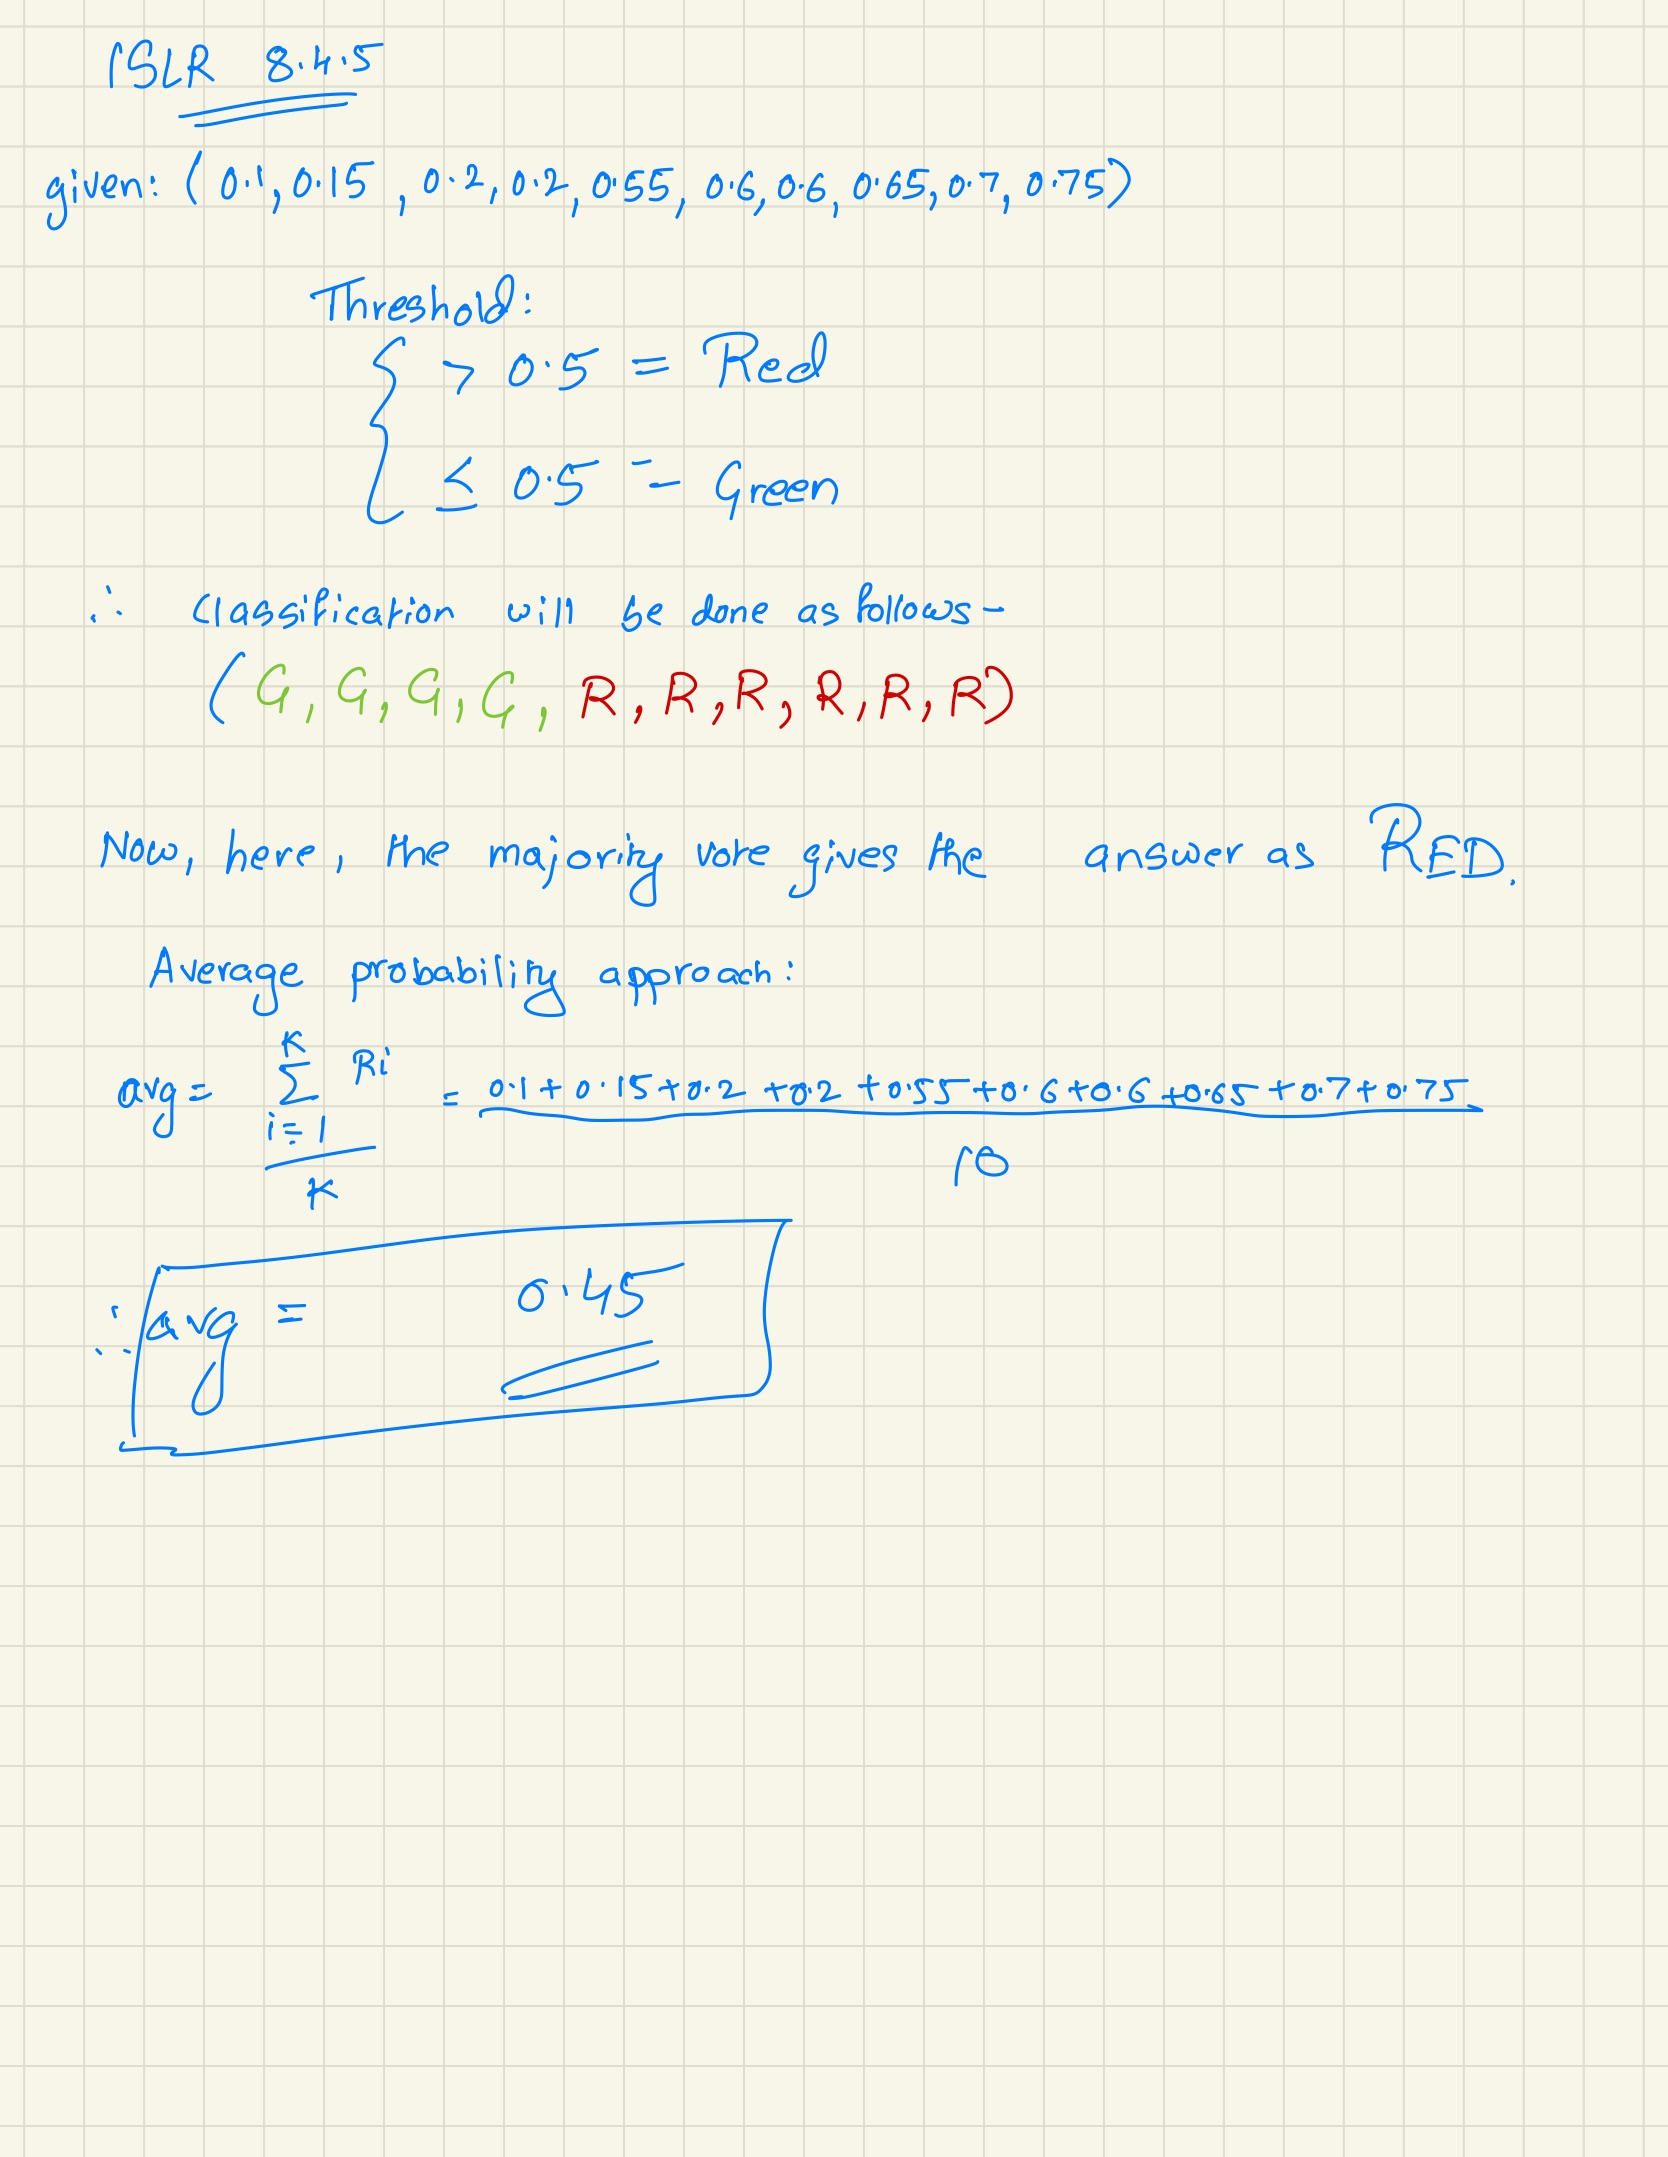

## ISLR 9.7.3

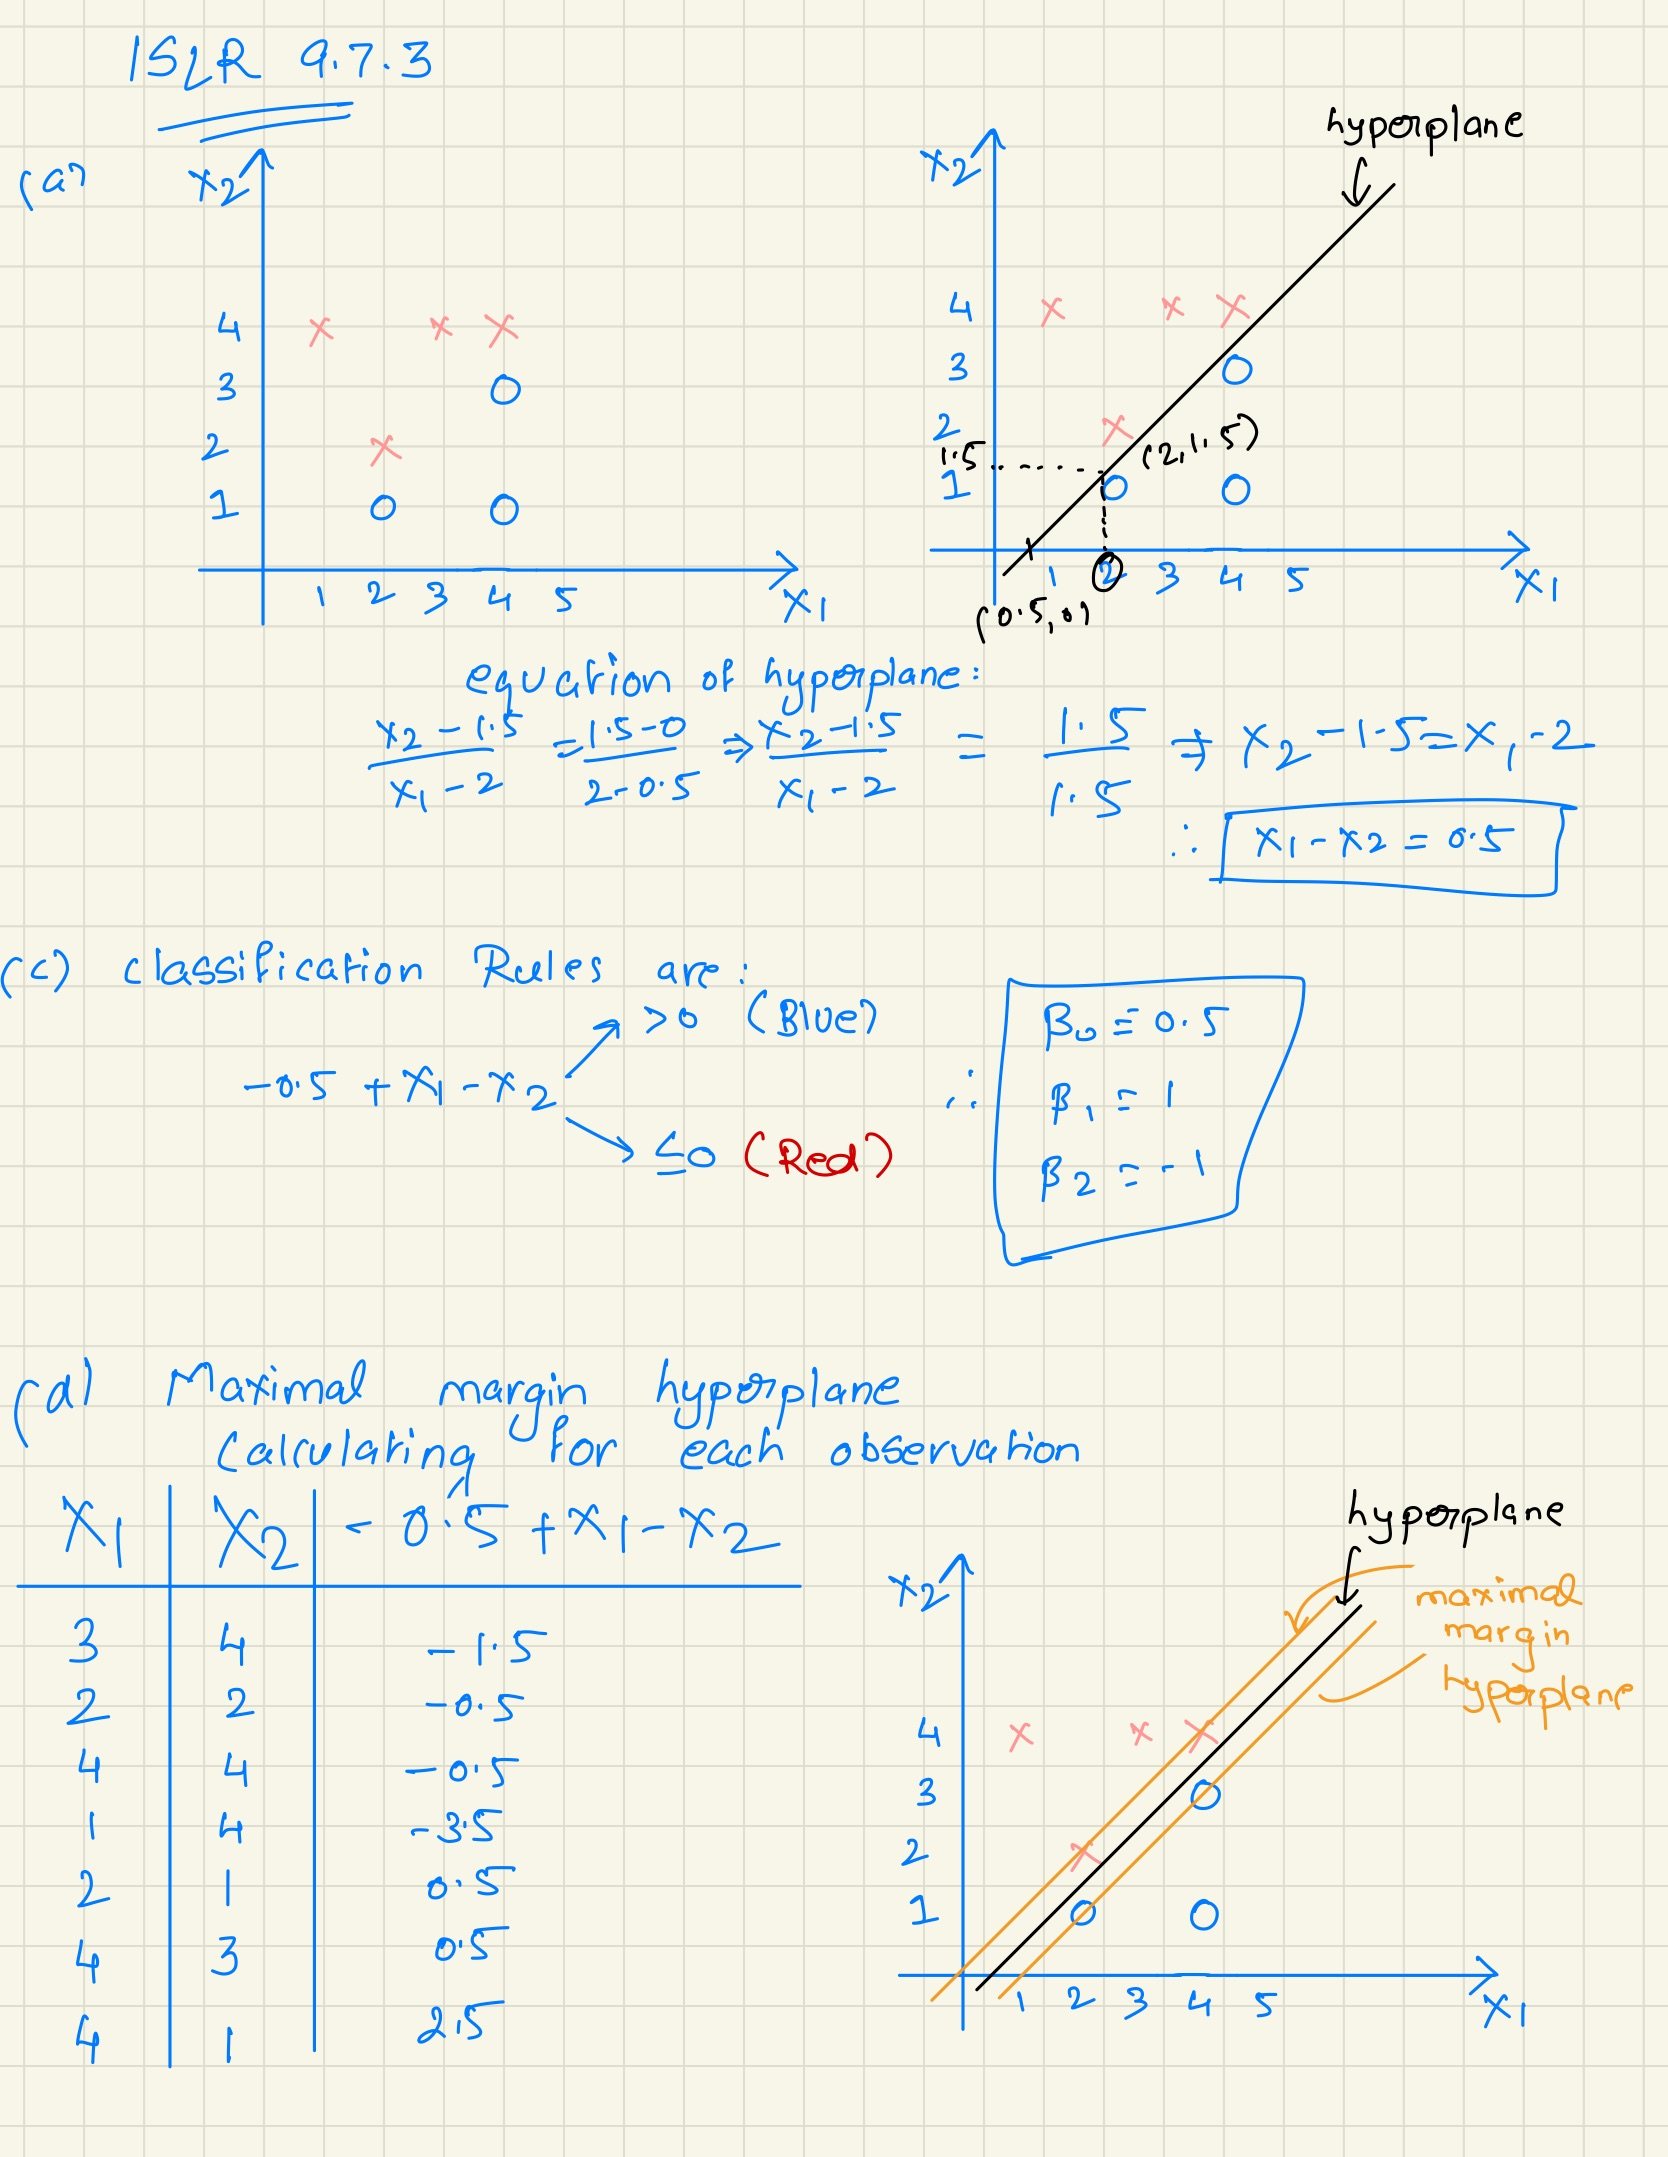

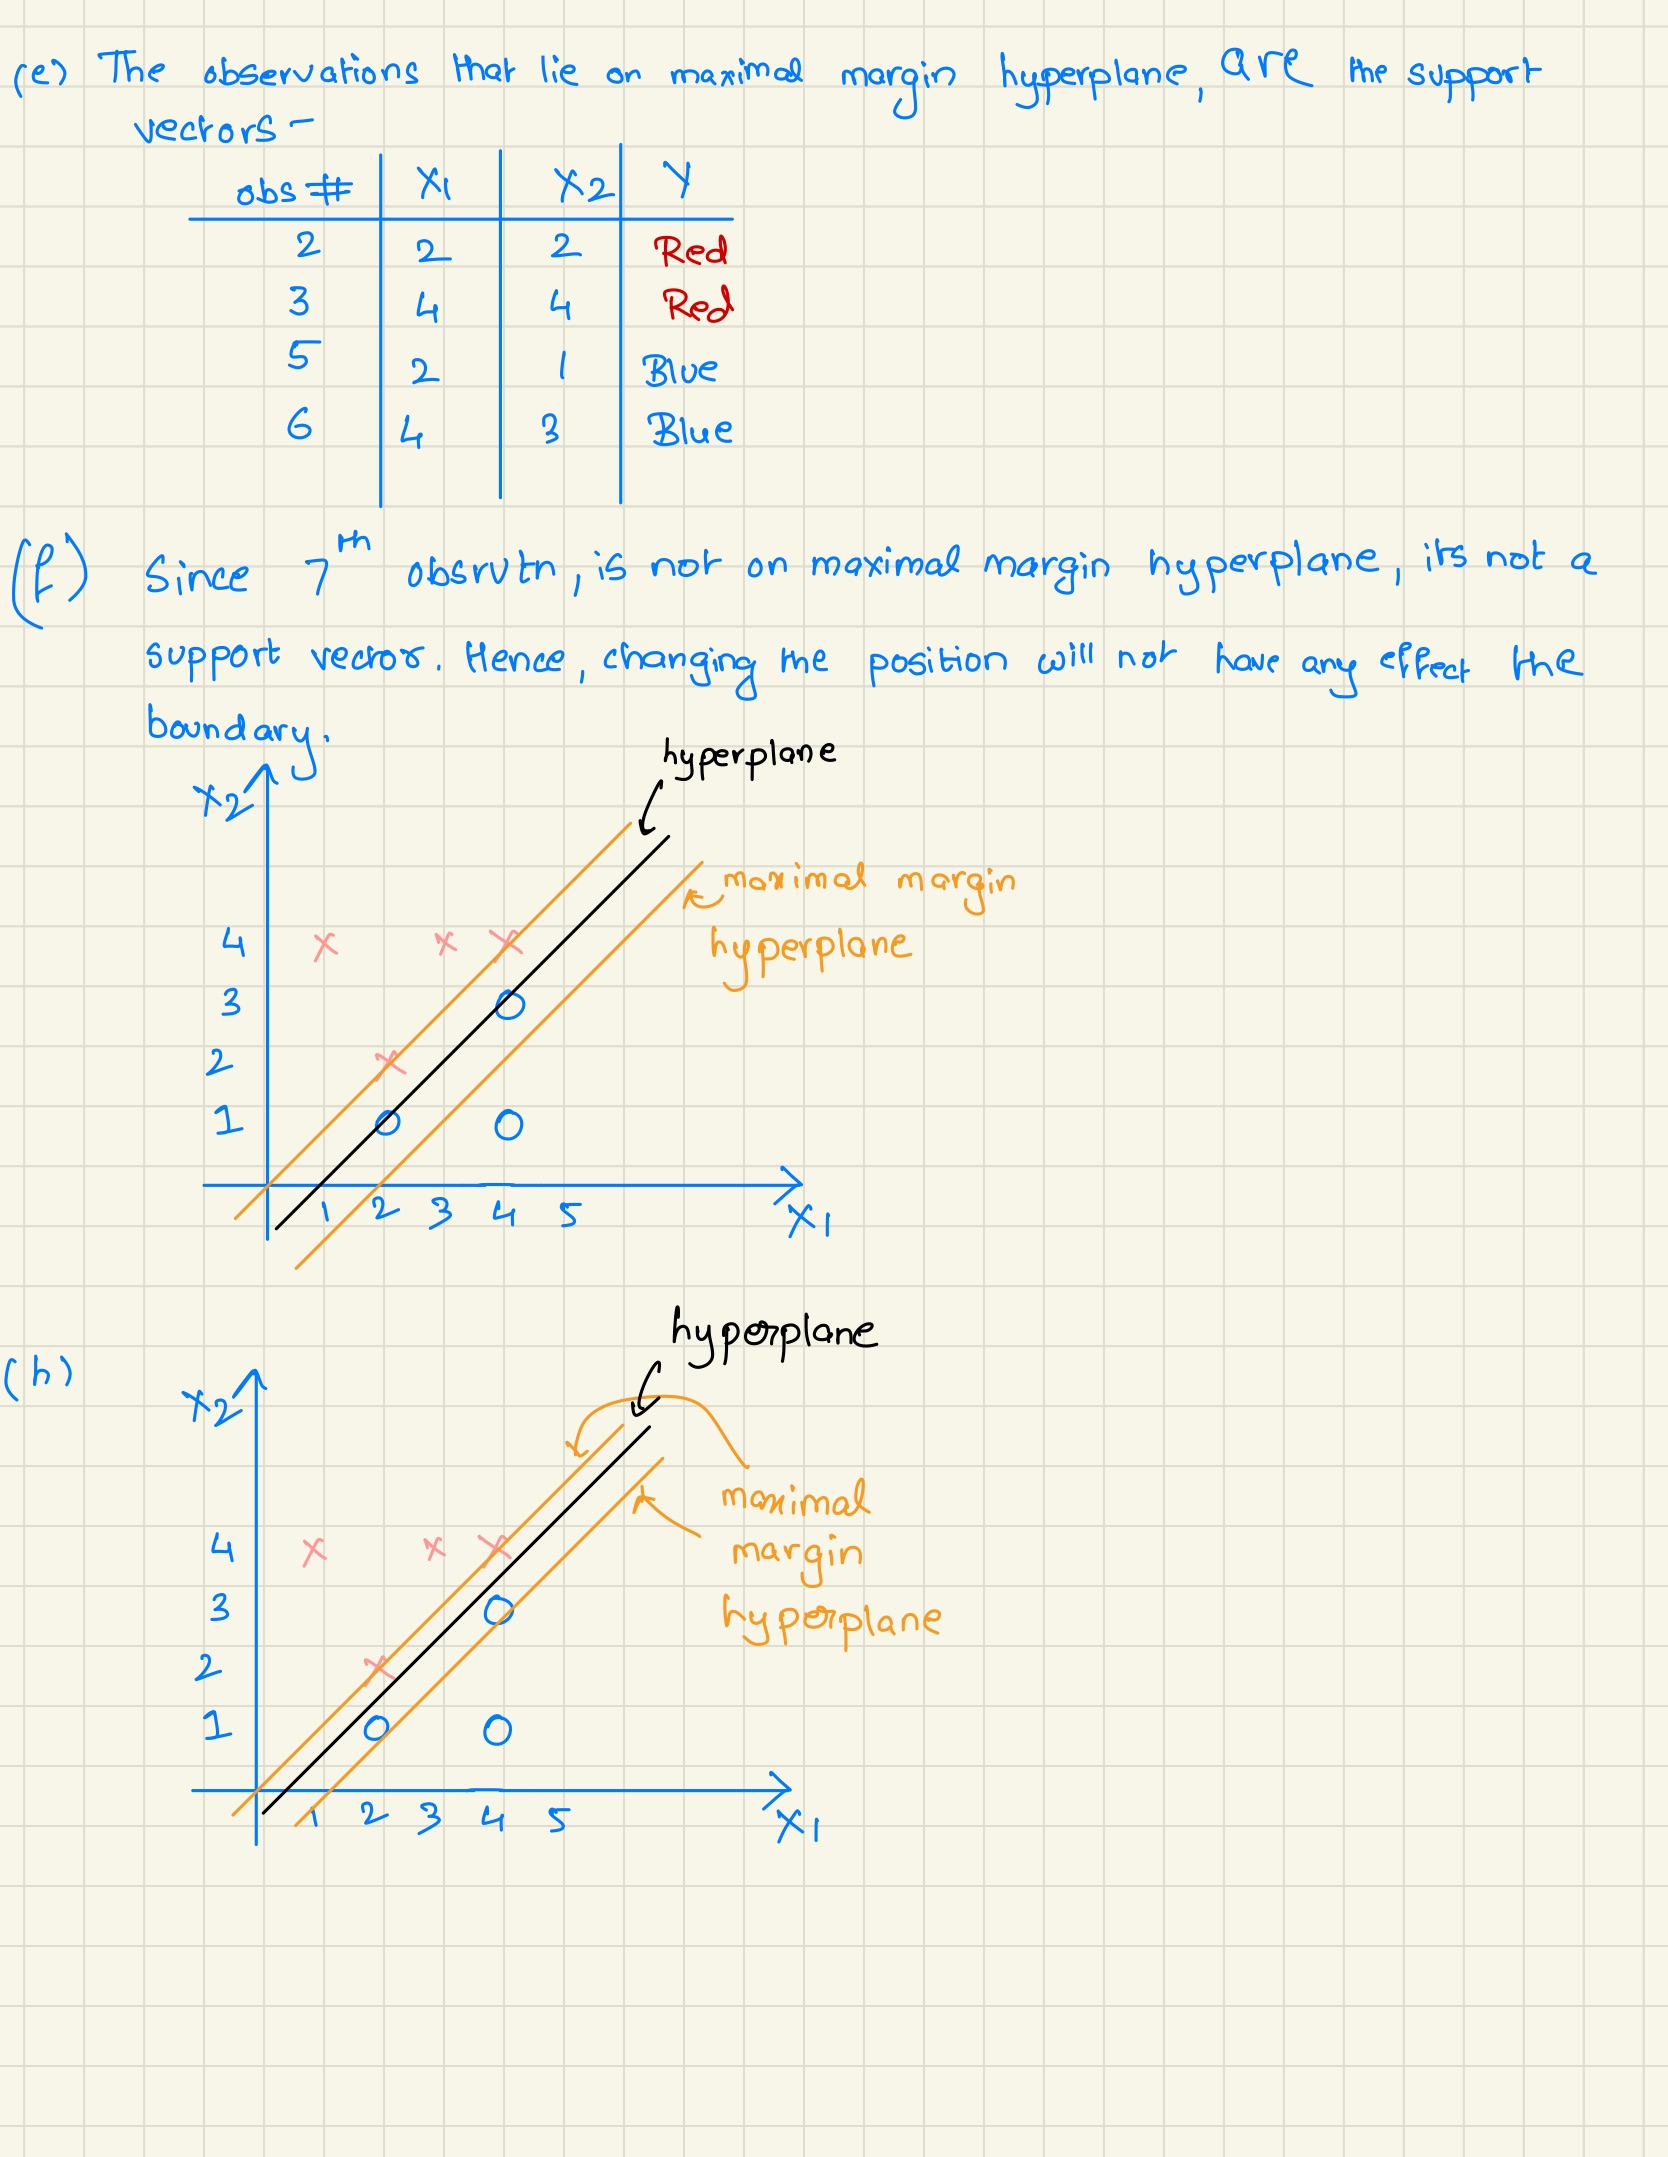